<a href="https://colab.research.google.com/github/BrainConnection/Qiskit/blob/main/Project%20Quantum%20Challenge/%231%20IBMQ%20QASM%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install matplotlib

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import C3XGate, SwapGate

In [ ]:
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

In [ ]:
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")

sampler = Sampler(backend=backend)

#1. Fair Quantum Coin Operator & Four-Sided Fair Quantum Coin Operator

1) Quantum Coin State

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


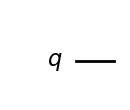

In [ ]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.draw("mpl")

2) Fair Quantum Coin Operator

Fair Quantum Coin Operator

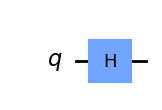

In [ ]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.h(0)
Two_Sided_Fair_Coin.draw("mpl")

Verifying Fair Quantum Coin Operator

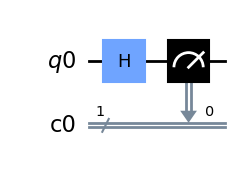

In [ ]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
Two_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

Two_Sided_Fair_Coin_Circuit.h(q0)
Two_Sided_Fair_Coin_Circuit.measure(q0, c0)

Two_Sided_Fair_Coin_Circuit.draw("mpl")

>>> Job ID: cl7qqgh5o5utp9bqduog
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.50215, 0: 0.49785}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.50215, 0: 0.49785}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


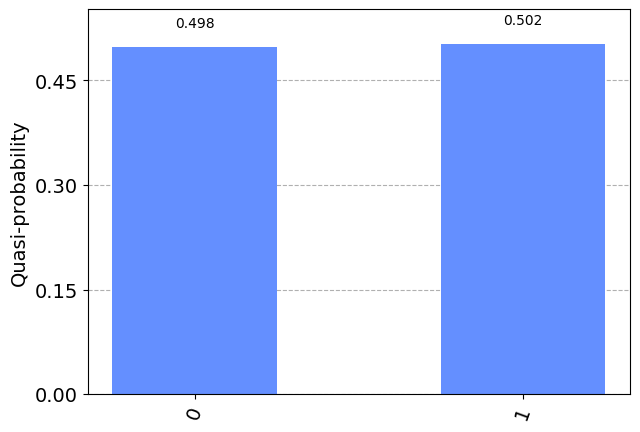

In [ ]:
job = sampler.run(Two_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

3) Four-Sided Quantum Coin State

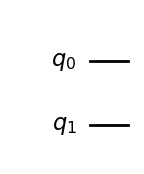

In [ ]:
Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.draw("mpl")

4) Four-Sided Fair Quantum Coin Operator

Four-Sided Fair Quantum Coin Operator

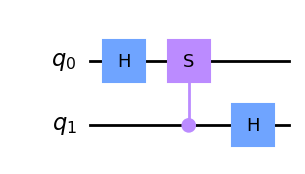

In [ ]:
from qiskit.circuit.library.standard_gates import SGate, TGate

csgate = SGate().control(1) # the parameter is the amount of control points you want

Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.h(0)
Four_Sided_Fair_Coin.append(csgate, [1, 0])
Four_Sided_Fair_Coin.h(1)

Four_Sided_Fair_Coin.draw("mpl")

Verifying Four-Sided Fair Quantum Coin Operator

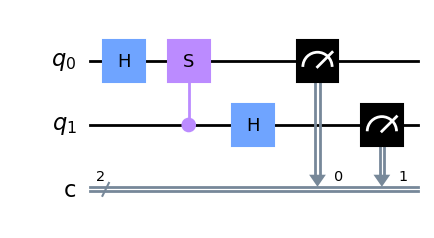

In [ ]:
qubits = QuantumRegister(2, 'q')
clbits = ClassicalRegister(2, 'c')
Four_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,q1,) = qubits
(c0,c1,) = clbits

Four_Sided_Fair_Coin_Circuit.h(q0)
Four_Sided_Fair_Coin_Circuit.append(csgate, [q1, q0])
Four_Sided_Fair_Coin_Circuit.h(q1)
Four_Sided_Fair_Coin_Circuit.measure(qubits, clbits)

Four_Sided_Fair_Coin_Circuit.draw("mpl")

>>> Job ID: cl7qqh96mcdhud4ef1u0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.2494, 3: 0.24806, 2: 0.24928, 0: 0.25326}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.2494, 3: 0.24806, 2: 0.24928, 0: 0.25326}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


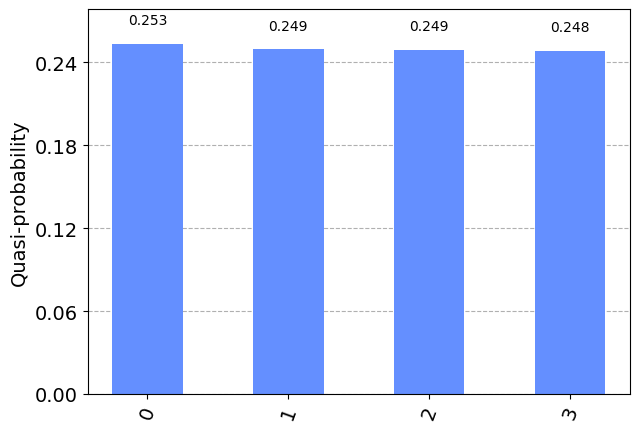

In [ ]:
job = sampler.run(Four_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

5) Fairness Check

all matrix elements of each operator have same absolute value, thus unbiased coin

#2. Location on the Board

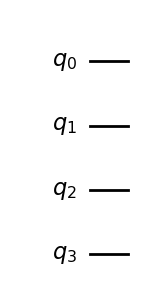

In [ ]:
qreg_q = QuantumRegister(4, 'q')
Board = QuantumCircuit(qreg_q)

Board.draw("mpl")

#3. Quantum Coin with Shift Operator

1) Shift Operator

Right Shift Operator

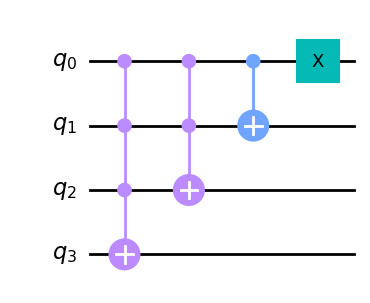

In [ ]:
qreg_q = QuantumRegister(4, 'q')
Shift = QuantumCircuit(qreg_q)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.draw("mpl")

Verifying Right Shift Operator

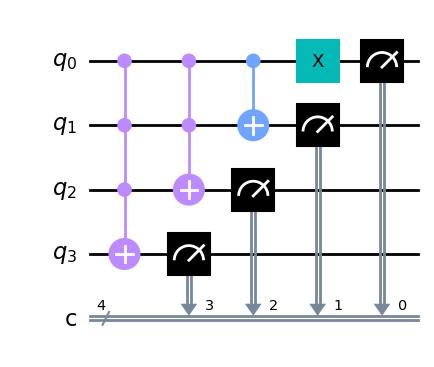

In [ ]:
from qiskit.circuit.library.standard_gates import C3XGate

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
Shift = QuantumCircuit(qreg_q, creg_c)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.measure(qreg_q, creg_c)

Shift.draw("mpl")

>>> Job ID: cl7qqi7l4q34kqgke3p0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


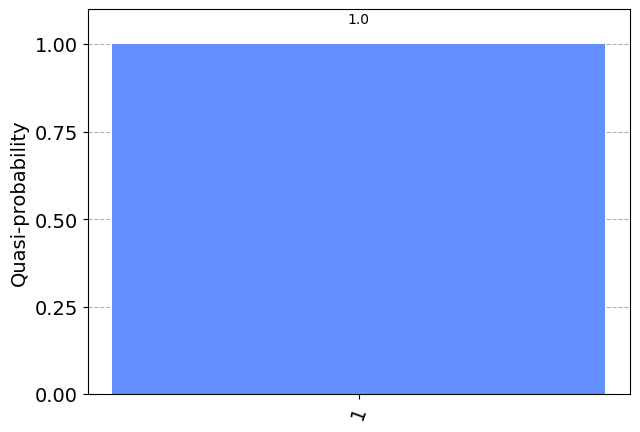

In [ ]:
job = sampler.run(Shift, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Right Shift. |0000> -> |0001>
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Shift Operator with Quantum Coin Operator

Shift Operator

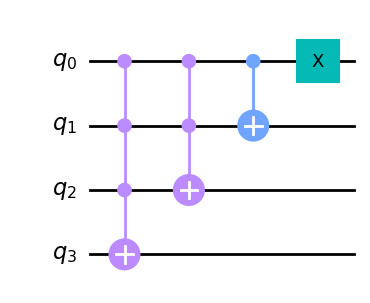

In [ ]:
Shift = QuantumCircuit(4)
Shift.append(C3XGate(), [0,1,2,3])
Shift.ccx(0,1,2)
Shift.cx(0,1)
Shift.x(0)

Shift.draw("mpl")

1 Step Board Evolution Operator

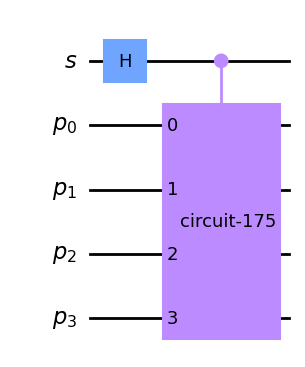

In [ ]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.draw("mpl")

N Step Board Evolution Operator

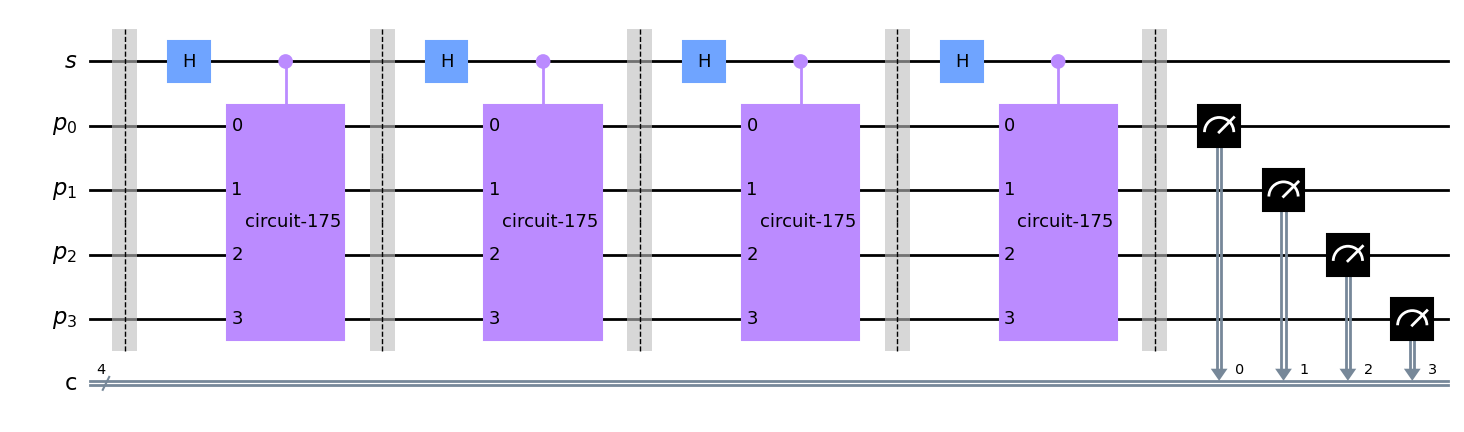

In [ ]:
# varying N
N = 4

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl7qqitfa6vtjv8rtgdg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.06284, 2: 0.12706, 0: 0.06197, 3: 0.12381, 1: 0.62432}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.06284, 2: 0.12706, 0: 0.06197, 3: 0.12381, 1: 0.62432}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

4


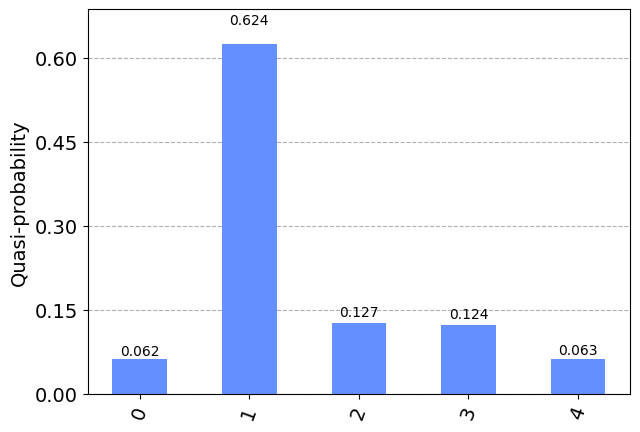

In [ ]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying N Step Board Evolution Operator

>>> Job ID: cl7qqj95o5utp9bqe090
>>> Job Status: JobStatus.DONE
>>> SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
0
{0: 1.0}


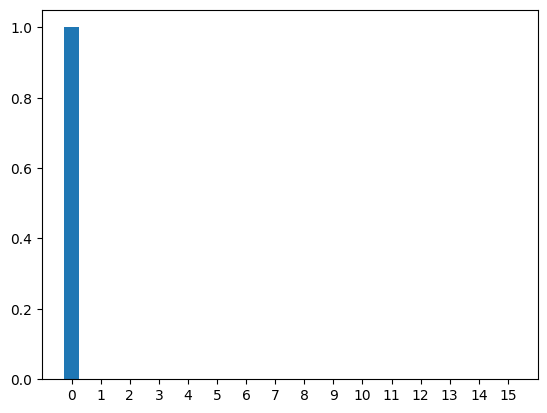



>>> Job ID: cl7qql5fa6vtjv8rthn0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.50066, 0: 0.49934}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.50066, 0: 0.49934}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
1
{1: 0.50066, 0: 0.49934}


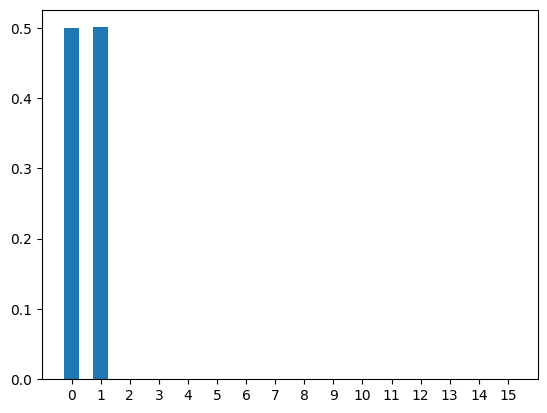



>>> Job ID: cl7qqlh6mcdhud4ef4gg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.50138, 0: 0.24917, 2: 0.24945}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.50138, 0: 0.24917, 2: 0.24945}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
2
{1: 0.50138, 0: 0.24917, 2: 0.24945}


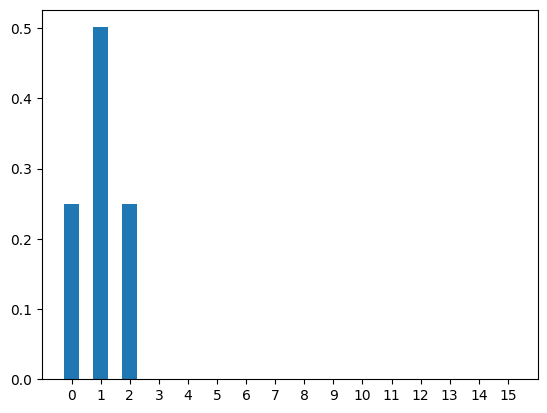



>>> Job ID: cl7qqm5fa6vtjv8rtifg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.12457, 0: 0.12513, 1: 0.62642, 3: 0.12388}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.12457, 0: 0.12513, 1: 0.62642, 3: 0.12388}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
3
{2: 0.12457, 0: 0.12513, 1: 0.62642, 3: 0.12388}


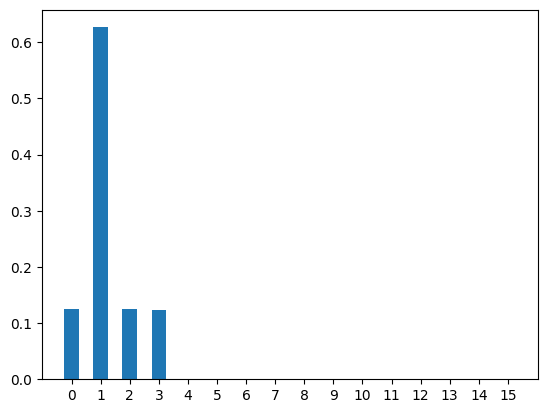



>>> Job ID: cl7qqmn75e3r3c6dscsg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.12606, 4: 0.06301, 1: 0.62137, 2: 0.126, 0: 0.06356}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.12606, 4: 0.06301, 1: 0.62137, 2: 0.126, 0: 0.06356}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
4
{3: 0.12606, 4: 0.06301, 1: 0.62137, 2: 0.126, 0: 0.06356}


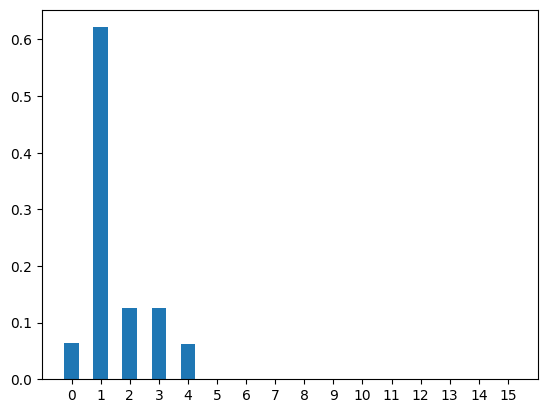



>>> Job ID: cl7qqnf75e3r3c6dsd90
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{3: 0.12377, 4: 0.15539, 0: 0.03151, 2: 0.12516, 5: 0.03047, 1: 0.5337}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {3: 0.12377, 4: 0.15539, 0: 0.03151, 2: 0.12516, 5: 0.03047, 1: 0.5337}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
5
{3: 0.12377, 4: 0.15539, 0: 0.03151, 2: 0.12516, 5: 0.03047, 1: 0.5337}


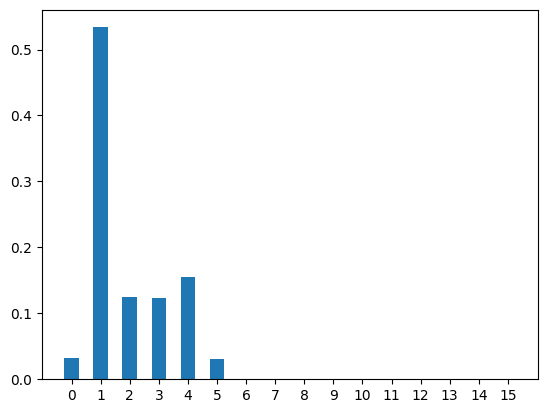



>>> Job ID: cl7qqntfa6vtjv8rtjk0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.20188, 0: 0.01604, 3: 0.12408, 5: 0.15747, 1: 0.40768, 6: 0.01517, 4: 0.07768}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.20188, 0: 0.01604, 3: 0.12408, 5: 0.15747, 1: 0.40768, 6: 0.01517, 4: 0.07768}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
6
{2: 0.20188, 0: 0.01604, 3: 0.12408, 5: 0.15747, 1: 0.40768, 6: 0.01517, 4: 0.07768}


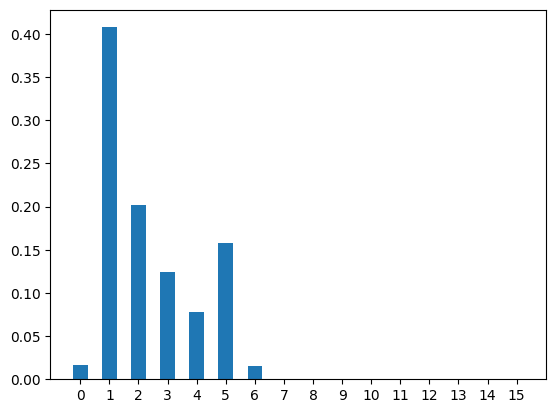



>>> Job ID: cl7qqod7pau17fl1h1c0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{5: 0.03986, 1: 0.29064, 2: 0.31875, 7: 0.00804, 0: 0.00734, 3: 0.13289, 6: 0.1315, 4: 0.07098}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {5: 0.03986, 1: 0.29064, 2: 0.31875, 7: 0.00804, 0: 0.00734, 3: 0.13289, 6: 0.1315, 4: 0.07098}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
7
{5: 0.03986, 1: 0.29064, 2: 0.31875, 7: 0.00804, 0: 0.00734, 3: 0.13289, 6: 0.1315, 4: 0.07098}


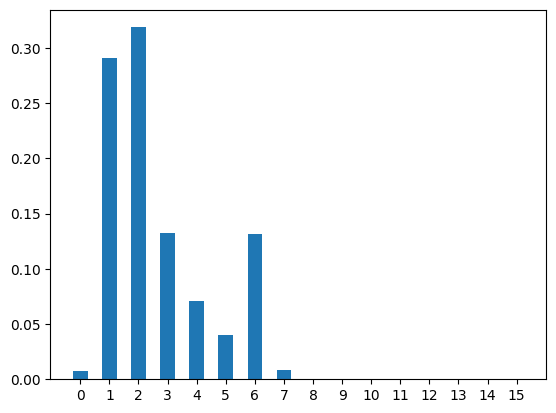



>>> Job ID: cl7qqp5fa6vtjv8rtke0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.00394, 5: 0.07108, 1: 0.19601, 2: 0.41315, 6: 0.03848, 4: 0.06893, 0: 0.0042, 7: 0.10279, 3: 0.10142}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.00394, 5: 0.07108, 1: 0.19601, 2: 0.41315, 6: 0.03848, 4: 0.06893, 0: 0.0042, 7: 0.10279, 3: 0.10142}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
8
{8: 0.00394, 5: 0.07108, 1: 0.19601, 2: 0.41315, 6: 0.03848, 4: 0.06893, 0: 0.0042, 7: 0.10279, 3: 0.10142}


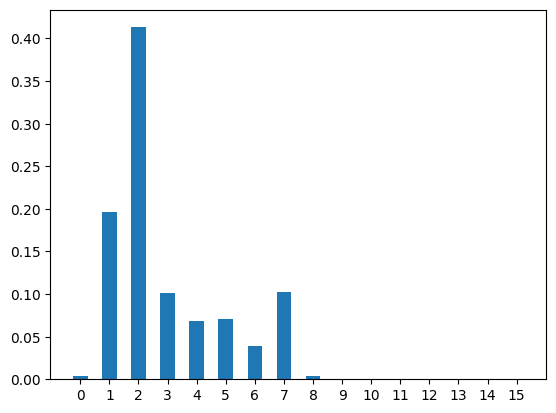



>>> Job ID: cl7qqph5o5utp9bqe39g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00214, 8: 0.07119, 5: 0.06989, 1: 0.12706, 2: 0.4527, 4: 0.07039, 6: 0.07813, 3: 0.06311, 0: 0.0021, 7: 0.06329}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00214, 8: 0.07119, 5: 0.06989, 1: 0.12706, 2: 0.4527, 4: 0.07039, 6: 0.07813, 3: 0.06311, 0: 0.0021, 7: 0.06329}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
9
{9: 0.00214, 8: 0.07119, 5: 0.06989, 1: 0.12706, 2: 0.4527, 4: 0.07039, 6: 0.07813, 3: 0.06311, 0: 0.0021, 7: 0.06329}


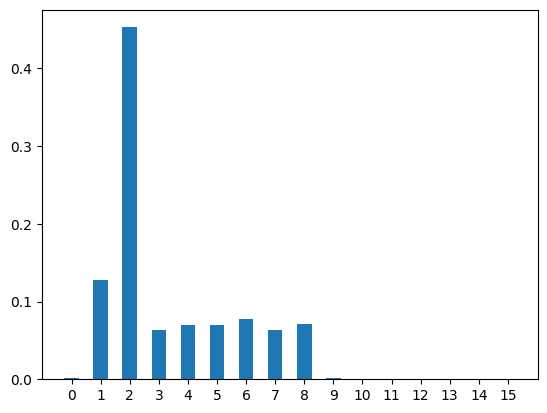



>>> Job ID: cl7qqq7l4q34kqgke8fg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00089, 9: 0.05038, 0: 0.00093, 3: 0.06167, 7: 0.06203, 8: 0.08801, 1: 0.07903, 5: 0.06917, 2: 0.43862, 6: 0.05114, 4: 0.09813}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00089, 9: 0.05038, 0: 0.00093, 3: 0.06167, 7: 0.06203, 8: 0.08801, 1: 0.07903, 5: 0.06917, 2: 0.43862, 6: 0.05114, 4: 0.09813}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
10
{10: 0.00089, 9: 0.05038, 0: 0.00093, 3: 0.06167, 7: 0.06203, 8: 0.08801, 1: 0.07903, 5: 0.06917, 2: 0.43862, 6: 0.05114, 4: 0.09813}


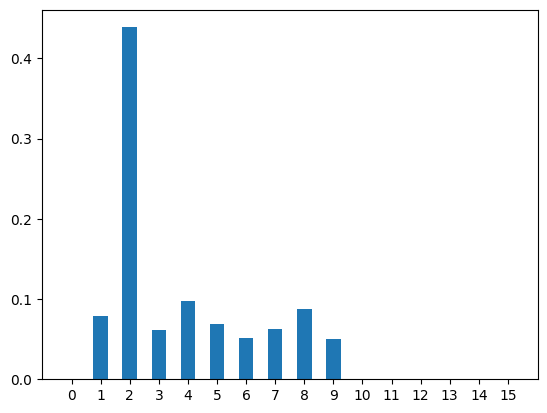



>>> Job ID: cl7qqs775e3r3c6dsffg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.00049, 5: 0.0732, 8: 0.03562, 10: 0.0327, 0: 0.00038, 7: 0.03353, 3: 0.11405, 2: 0.38348, 9: 0.10074, 6: 0.04891, 4: 0.1262, 1: 0.0507}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.00049, 5: 0.0732, 8: 0.03562, 10: 0.0327, 0: 0.00038, 7: 0.03353, 3: 0.11405, 2: 0.38348, 9: 0.10074, 6: 0.04891, 4: 0.1262, 1: 0.0507}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
11
{11: 0.00049, 5: 0.0732, 8: 0.03562, 10: 0.0327, 0: 0.00038, 7: 0.03353, 3: 0.11405, 2: 0.38348, 9: 0.10074, 6: 0.04891, 4: 0.1262, 1: 0.0507}


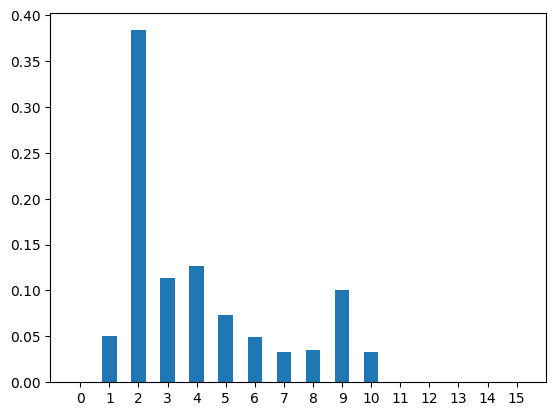



>>> Job ID: cl7qqsnl4q34kqgke9r0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.02053, 8: 0.0384, 9: 0.01891, 0: 0.00029, 7: 0.04879, 3: 0.19571, 12: 0.00023, 5: 0.0552, 1: 0.03041, 6: 0.0487, 4: 0.12397, 10: 0.10092, 2: 0.31794}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.02053, 8: 0.0384, 9: 0.01891, 0: 0.00029, 7: 0.04879, 3: 0.19571, 12: 0.00023, 5: 0.0552, 1: 0.03041, 6: 0.0487, 4: 0.12397, 10: 0.10092, 2: 0.31794}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
12
{11: 0.02053, 8: 0.0384, 9: 0.01891, 0: 0.00029, 7: 0.04879, 3: 0.19571, 12: 0.00023, 5: 0.0552, 1: 0.03041, 6: 0.0487, 4: 0.12397, 10: 0.10092, 2: 0.31794}


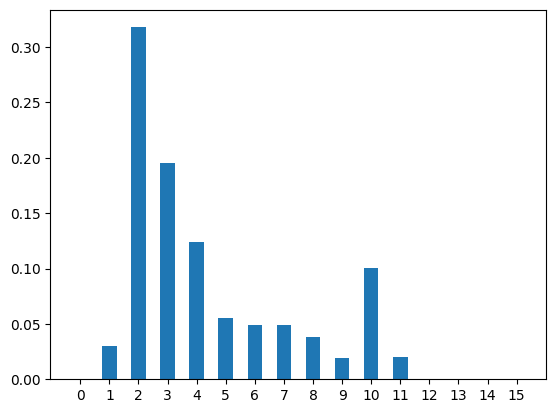



>>> Job ID: cl7qqt95o5utp9bqe580
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.0001, 10: 0.01765, 1: 0.01733, 9: 0.0537, 11: 0.0903, 4: 0.08749, 6: 0.04821, 2: 0.25171, 8: 0.05149, 5: 0.04365, 12: 0.01215, 0: 0.00015, 7: 0.04892, 3: 0.27715}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.0001, 10: 0.01765, 1: 0.01733, 9: 0.0537, 11: 0.0903, 4: 0.08749, 6: 0.04821, 2: 0.25171, 8: 0.05149, 5: 0.04365, 12: 0.01215, 0: 0.00015, 7: 0.04892, 3: 0.27715}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
13
{13: 0.0001, 10: 0.01765, 1: 0.01733, 9: 0.0537, 11: 0.0903, 4: 0.08749, 6: 0.04821, 2: 0.25171, 8: 0.05149, 5: 0.04365, 12: 0.01215, 0: 0.00015, 7: 0.04892, 3: 0.27715}


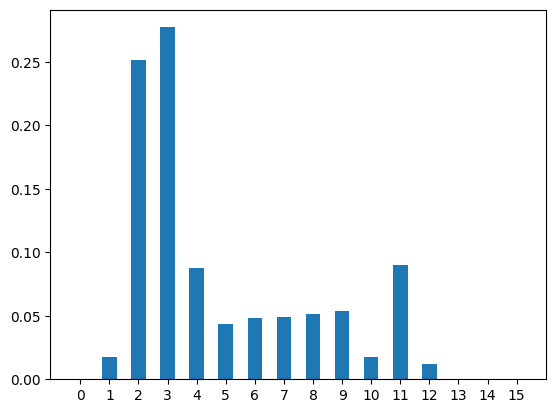



>>> Job ID: cl7qqtp5o5utp9bqe5lg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 8e-05, 13: 0.00757, 1: 0.01062, 9: 0.03896, 8: 0.03812, 5: 0.05673, 12: 0.07588, 0: 5e-05, 7: 0.04828, 3: 0.33712, 10: 0.05794, 2: 0.18516, 4: 0.0497, 6: 0.06158, 11: 0.03221}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 8e-05, 13: 0.00757, 1: 0.01062, 9: 0.03896, 8: 0.03812, 5: 0.05673, 12: 0.07588, 0: 5e-05, 7: 0.04828, 3: 0.33712, 10: 0.05794, 2: 0.18516, 4: 0.0497, 6: 0.06158, 11: 0.03221}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
14
{14: 8e-05, 13: 0.00757, 1: 0.01062, 9: 0.03896, 8: 0.03812, 5: 0.05673, 12: 0.07588, 0: 5e-05, 7: 0.04828, 3: 0.33712, 10: 0.05794, 2: 0.18516, 4: 0.0497, 6: 0.06158, 11: 0.03221}


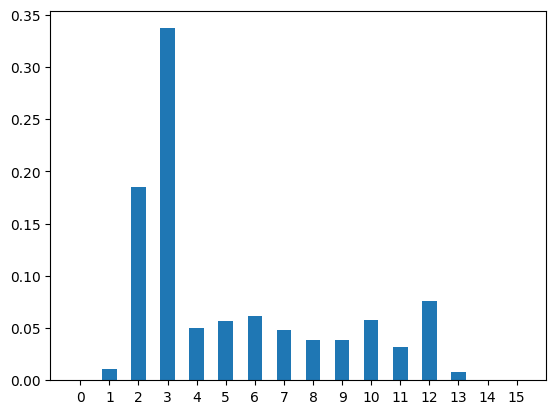



>>> Job ID: cl7qquh6mcdhud4ef9jg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.0045, 1: 0.00601, 15: 2e-05, 10: 0.0241, 9: 0.02807, 11: 0.04665, 13: 0.05917, 8: 0.03623, 5: 0.0918, 12: 0.05021, 6: 0.07344, 4: 0.03534, 0: 4e-05, 7: 0.05, 3: 0.36344, 2: 0.13098}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.0045, 1: 0.00601, 15: 2e-05, 10: 0.0241, 9: 0.02807, 11: 0.04665, 13: 0.05917, 8: 0.03623, 5: 0.0918, 12: 0.05021, 6: 0.07344, 4: 0.03534, 0: 4e-05, 7: 0.05, 3: 0.36344, 2: 0.13098}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
15
{14: 0.0045, 1: 0.00601, 15: 2e-05, 10: 0.0241, 9: 0.02807, 11: 0.04665, 13: 0.05917, 8: 0.03623, 5: 0.0918, 12: 0.05021, 6: 0.07344, 4: 0.03534, 0: 4e-05, 7: 0.05, 3: 0.36344, 2: 0.13098}


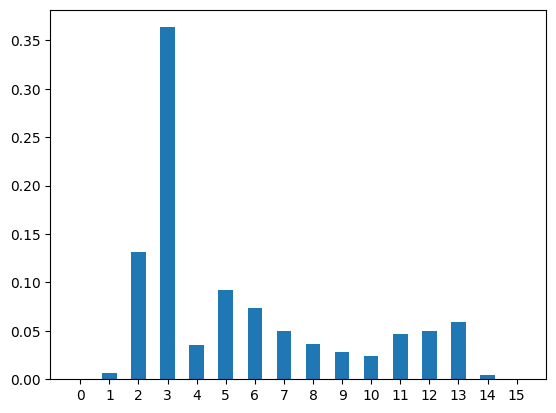



>>> Job ID: cl7qqv96mcdhud4ef9ug
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00349, 11: 0.01907, 15: 0.00249, 10: 0.03195, 14: 0.04579, 2: 0.09291, 4: 0.05887, 6: 0.06399, 13: 0.06459, 0: 2e-05, 7: 0.04023, 3: 0.3537, 8: 0.03748, 12: 0.03022, 5: 0.1171, 9: 0.0381}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00349, 11: 0.01907, 15: 0.00249, 10: 0.03195, 14: 0.04579, 2: 0.09291, 4: 0.05887, 6: 0.06399, 13: 0.06459, 0: 2e-05, 7: 0.04023, 3: 0.3537, 8: 0.03748, 12: 0.03022, 5: 0.1171, 9: 0.0381}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
16
{1: 0.00349, 11: 0.01907, 15: 0.00249, 10: 0.03195, 14: 0.04579, 2: 0.09291, 4: 0.05887, 6: 0.06399, 13: 0.06459, 0: 2e-05, 7: 0.04023, 3: 0.3537, 8: 0.03748, 12: 0.03022, 5: 0.1171, 9: 0.0381}


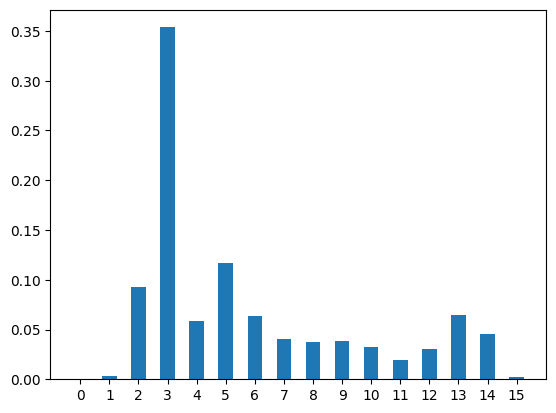



>>> Job ID: cl7qr057pau17fl1h61g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00236, 2: 0.0636, 13: 0.01402, 8: 0.03781, 11: 0.04027, 9: 0.03695, 12: 0.0282, 5: 0.12048, 14: 0.07505, 0: 0.00133, 3: 0.32291, 7: 0.03375, 4: 0.10859, 6: 0.04204, 10: 0.04011, 15: 0.03253}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00236, 2: 0.0636, 13: 0.01402, 8: 0.03781, 11: 0.04027, 9: 0.03695, 12: 0.0282, 5: 0.12048, 14: 0.07505, 0: 0.00133, 3: 0.32291, 7: 0.03375, 4: 0.10859, 6: 0.04204, 10: 0.04011, 15: 0.03253}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
17
{1: 0.00236, 2: 0.0636, 13: 0.01402, 8: 0.03781, 11: 0.04027, 9: 0.03695, 12: 0.0282, 5: 0.12048, 14: 0.07505, 0: 0.00133, 3: 0.32291, 7: 0.03375, 4: 0.10859, 6: 0.04204, 10: 0.04011, 15: 0.03253}


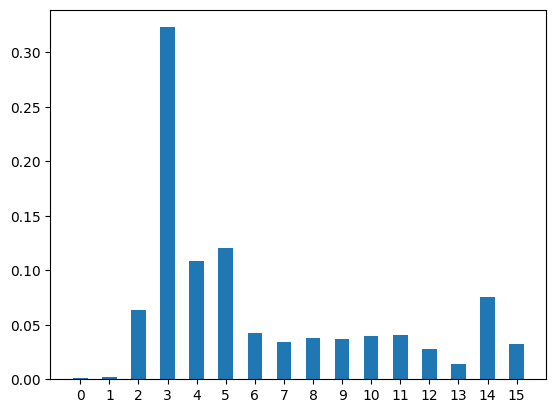



>>> Job ID: cl7qr0l7pau17fl1h6g0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00194, 14: 0.00929, 2: 0.04182, 9: 0.03659, 15: 0.07684, 10: 0.03077, 5: 0.09281, 12: 0.03886, 13: 0.04153, 6: 0.03073, 4: 0.17359, 11: 0.03087, 7: 0.04533, 0: 0.02264, 3: 0.28095, 8: 0.04544}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00194, 14: 0.00929, 2: 0.04182, 9: 0.03659, 15: 0.07684, 10: 0.03077, 5: 0.09281, 12: 0.03886, 13: 0.04153, 6: 0.03073, 4: 0.17359, 11: 0.03087, 7: 0.04533, 0: 0.02264, 3: 0.28095, 8: 0.04544}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
18
{1: 0.00194, 14: 0.00929, 2: 0.04182, 9: 0.03659, 15: 0.07684, 10: 0.03077, 5: 0.09281, 12: 0.03886, 13: 0.04153, 6: 0.03073, 4: 0.17359, 11: 0.03087, 7: 0.04533, 0: 0.02264, 3: 0.28095, 8: 0.04544}


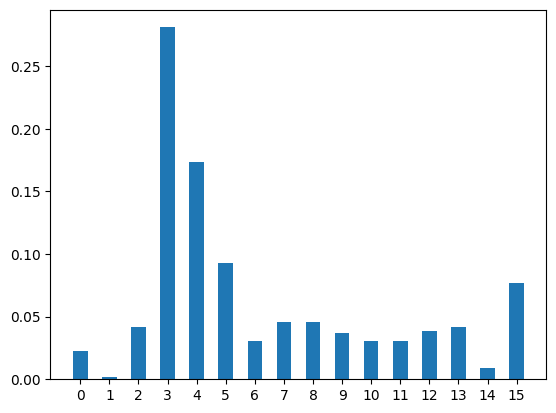



>>> Job ID: cl7qr1dfa6vtjv8rtp30
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.02896, 11: 0.02467, 5: 0.0565, 12: 0.02005, 8: 0.05027, 1: 0.01478, 10: 0.03051, 15: 0.01418, 14: 0.0469, 13: 0.02656, 7: 0.06514, 3: 0.23304, 0: 0.07112, 9: 0.03781, 6: 0.04402, 4: 0.23549}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.02896, 11: 0.02467, 5: 0.0565, 12: 0.02005, 8: 0.05027, 1: 0.01478, 10: 0.03051, 15: 0.01418, 14: 0.0469, 13: 0.02656, 7: 0.06514, 3: 0.23304, 0: 0.07112, 9: 0.03781, 6: 0.04402, 4: 0.23549}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
19
{2: 0.02896, 11: 0.02467, 5: 0.0565, 12: 0.02005, 8: 0.05027, 1: 0.01478, 10: 0.03051, 15: 0.01418, 14: 0.0469, 13: 0.02656, 7: 0.06514, 3: 0.23304, 0: 0.07112, 9: 0.03781, 6: 0.04402, 4: 0.23549}


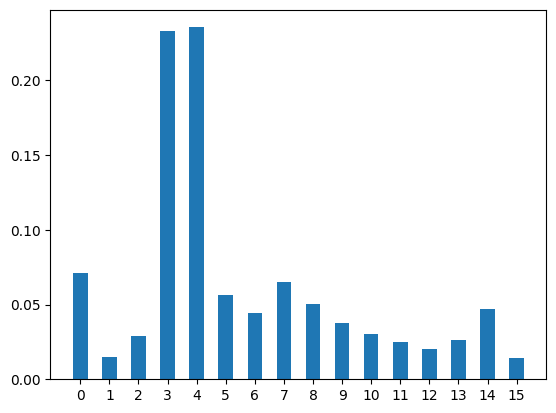



>>> Job ID: cl7qr2775e3r3c6dsing
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.02983, 14: 0.01484, 8: 0.04307, 9: 0.03236, 5: 0.02947, 12: 0.0276, 1: 0.06574, 13: 0.01952, 2: 0.02888, 15: 0.04036, 10: 0.03031, 6: 0.07603, 4: 0.28015, 0: 0.0271, 7: 0.07377, 3: 0.18097}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.02983, 14: 0.01484, 8: 0.04307, 9: 0.03236, 5: 0.02947, 12: 0.0276, 1: 0.06574, 13: 0.01952, 2: 0.02888, 15: 0.04036, 10: 0.03031, 6: 0.07603, 4: 0.28015, 0: 0.0271, 7: 0.07377, 3: 0.18097}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
20
{11: 0.02983, 14: 0.01484, 8: 0.04307, 9: 0.03236, 5: 0.02947, 12: 0.0276, 1: 0.06574, 13: 0.01952, 2: 0.02888, 15: 0.04036, 10: 0.03031, 6: 0.07603, 4: 0.28015, 0: 0.0271, 7: 0.07377, 3: 0.18097}


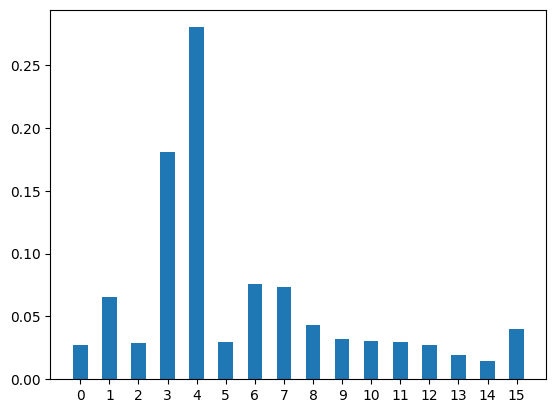



>>> Job ID: cl7qr2t7pau17fl1h7u0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.03333, 14: 0.02773, 8: 0.03007, 2: 0.05733, 11: 0.03009, 6: 0.10483, 4: 0.30887, 5: 0.02746, 12: 0.03069, 9: 0.02929, 1: 0.03859, 3: 0.15075, 0: 0.02871, 7: 0.05963, 15: 0.0125, 10: 0.03013}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.03333, 14: 0.02773, 8: 0.03007, 2: 0.05733, 11: 0.03009, 6: 0.10483, 4: 0.30887, 5: 0.02746, 12: 0.03069, 9: 0.02929, 1: 0.03859, 3: 0.15075, 0: 0.02871, 7: 0.05963, 15: 0.0125, 10: 0.03013}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
21
{13: 0.03333, 14: 0.02773, 8: 0.03007, 2: 0.05733, 11: 0.03009, 6: 0.10483, 4: 0.30887, 5: 0.02746, 12: 0.03069, 9: 0.02929, 1: 0.03859, 3: 0.15075, 0: 0.02871, 7: 0.05963, 15: 0.0125, 10: 0.03013}


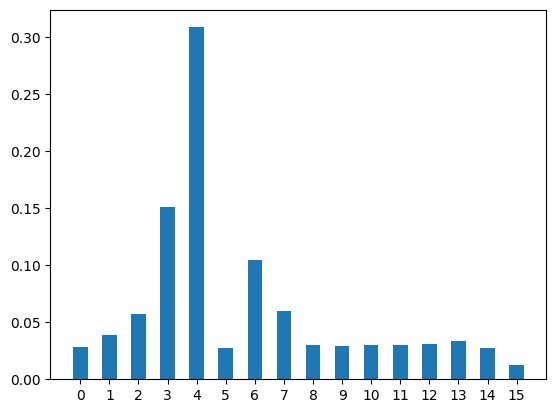



>>> Job ID: cl7qr3l7pau17fl1h8d0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.02799, 14: 0.02978, 9: 0.03695, 13: 0.02311, 11: 0.02991, 7: 0.03601, 0: 0.01972, 3: 0.15126, 6: 0.11511, 4: 0.29087, 2: 0.07678, 15: 0.03555, 10: 0.03624, 12: 0.02562, 5: 0.04811, 1: 0.01699}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.02799, 14: 0.02978, 9: 0.03695, 13: 0.02311, 11: 0.02991, 7: 0.03601, 0: 0.01972, 3: 0.15126, 6: 0.11511, 4: 0.29087, 2: 0.07678, 15: 0.03555, 10: 0.03624, 12: 0.02562, 5: 0.04811, 1: 0.01699}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
22
{8: 0.02799, 14: 0.02978, 9: 0.03695, 13: 0.02311, 11: 0.02991, 7: 0.03601, 0: 0.01972, 3: 0.15126, 6: 0.11511, 4: 0.29087, 2: 0.07678, 15: 0.03555, 10: 0.03624, 12: 0.02562, 5: 0.04811, 1: 0.01699}


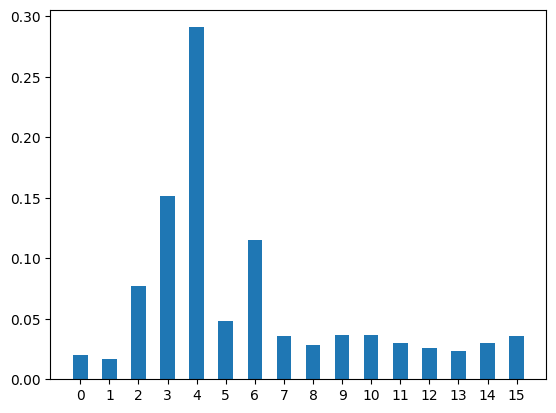



>>> Job ID: cl7qr4l7pau17fl1h8qg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.01825, 2: 0.003, 13: 0.02039, 8: 0.0441, 15: 0.01854, 10: 0.03847, 7: 0.02378, 0: 0.03207, 3: 0.10306, 9: 0.04877, 6: 0.10089, 4: 0.34151, 11: 0.03126, 1: 0.03217, 12: 0.02572, 5: 0.11802}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.01825, 2: 0.003, 13: 0.02039, 8: 0.0441, 15: 0.01854, 10: 0.03847, 7: 0.02378, 0: 0.03207, 3: 0.10306, 9: 0.04877, 6: 0.10089, 4: 0.34151, 11: 0.03126, 1: 0.03217, 12: 0.02572, 5: 0.11802}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
23
{14: 0.01825, 2: 0.003, 13: 0.02039, 8: 0.0441, 15: 0.01854, 10: 0.03847, 7: 0.02378, 0: 0.03207, 3: 0.10306, 9: 0.04877, 6: 0.10089, 4: 0.34151, 11: 0.03126, 1: 0.03217, 12: 0.02572, 5: 0.11802}


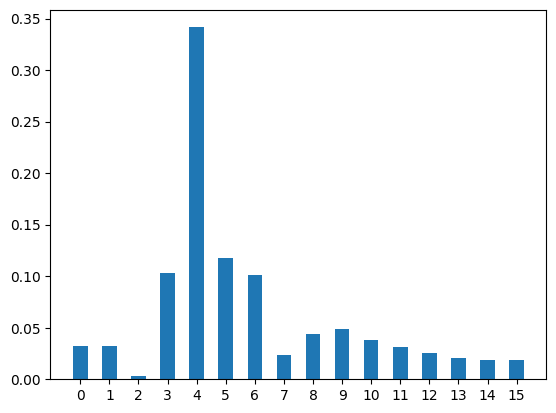



>>> Job ID: cl7qr5f75e3r3c6dskkg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.03323, 1: 0.02193, 11: 0.02626, 9: 0.04911, 13: 0.02507, 12: 0.02583, 5: 0.12528, 8: 0.06314, 4: 0.34212, 6: 0.07016, 14: 0.0239, 0: 0.01246, 3: 0.09643, 7: 0.03405, 10: 0.0322, 15: 0.01883}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.03323, 1: 0.02193, 11: 0.02626, 9: 0.04911, 13: 0.02507, 12: 0.02583, 5: 0.12528, 8: 0.06314, 4: 0.34212, 6: 0.07016, 14: 0.0239, 0: 0.01246, 3: 0.09643, 7: 0.03405, 10: 0.0322, 15: 0.01883}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
24
{2: 0.03323, 1: 0.02193, 11: 0.02626, 9: 0.04911, 13: 0.02507, 12: 0.02583, 5: 0.12528, 8: 0.06314, 4: 0.34212, 6: 0.07016, 14: 0.0239, 0: 0.01246, 3: 0.09643, 7: 0.03405, 10: 0.0322, 15: 0.01883}


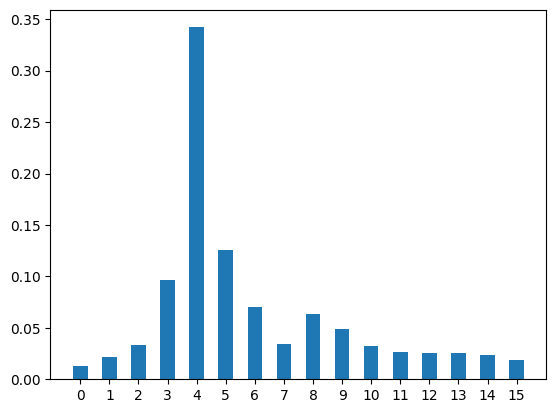



>>> Job ID: cl7qr6775e3r3c6dsl0g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.02478, 1: 0.01473, 2: 0.01851, 11: 0.02433, 8: 0.07108, 9: 0.03583, 14: 0.02543, 12: 0.02531, 5: 0.30563, 6: 0.08055, 4: 0.1611, 15: 0.02754, 10: 0.02348, 7: 0.04906, 0: 0.02588, 3: 0.08676}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.02478, 1: 0.01473, 2: 0.01851, 11: 0.02433, 8: 0.07108, 9: 0.03583, 14: 0.02543, 12: 0.02531, 5: 0.30563, 6: 0.08055, 4: 0.1611, 15: 0.02754, 10: 0.02348, 7: 0.04906, 0: 0.02588, 3: 0.08676}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
25
{13: 0.02478, 1: 0.01473, 2: 0.01851, 11: 0.02433, 8: 0.07108, 9: 0.03583, 14: 0.02543, 12: 0.02531, 5: 0.30563, 6: 0.08055, 4: 0.1611, 15: 0.02754, 10: 0.02348, 7: 0.04906, 0: 0.02588, 3: 0.08676}


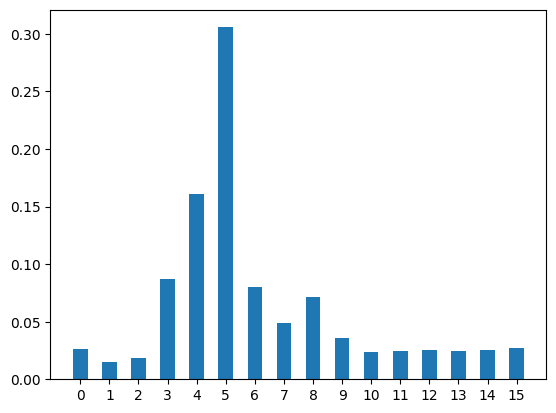



>>> Job ID: cl7qr6v75e3r3c6dsldg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.03127, 9: 0.02197, 11: 0.02965, 14: 0.02158, 13: 0.02407, 1: 0.02823, 12: 0.02948, 5: 0.30572, 8: 0.06086, 6: 0.01382, 4: 0.22938, 3: 0.00467, 0: 0.02203, 7: 0.13126, 15: 0.02026, 10: 0.02575}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.03127, 9: 0.02197, 11: 0.02965, 14: 0.02158, 13: 0.02407, 1: 0.02823, 12: 0.02948, 5: 0.30572, 8: 0.06086, 6: 0.01382, 4: 0.22938, 3: 0.00467, 0: 0.02203, 7: 0.13126, 15: 0.02026, 10: 0.02575}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
26
{2: 0.03127, 9: 0.02197, 11: 0.02965, 14: 0.02158, 13: 0.02407, 1: 0.02823, 12: 0.02948, 5: 0.30572, 8: 0.06086, 6: 0.01382, 4: 0.22938, 3: 0.00467, 0: 0.02203, 7: 0.13126, 15: 0.02026, 10: 0.02575}


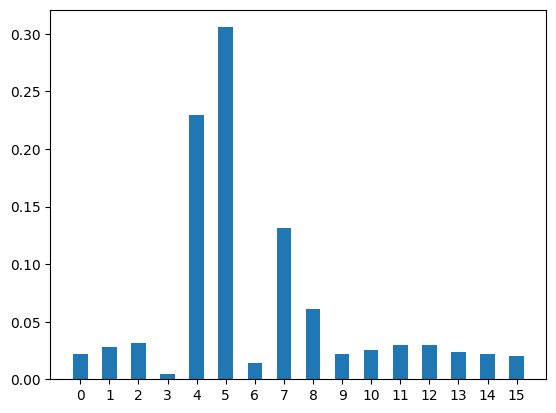



>>> Job ID: cl7qr7h6mcdhud4efepg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.03119, 1: 0.01641, 9: 0.03112, 11: 0.03922, 14: 0.02157, 13: 0.0255, 2: 0.02225, 12: 0.03148, 5: 0.21967, 15: 0.01954, 10: 0.03953, 0: 0.01588, 3: 0.03238, 7: 0.13142, 4: 0.22504, 6: 0.0978}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.03119, 1: 0.01641, 9: 0.03112, 11: 0.03922, 14: 0.02157, 13: 0.0255, 2: 0.02225, 12: 0.03148, 5: 0.21967, 15: 0.01954, 10: 0.03953, 0: 0.01588, 3: 0.03238, 7: 0.13142, 4: 0.22504, 6: 0.0978}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
27
{8: 0.03119, 1: 0.01641, 9: 0.03112, 11: 0.03922, 14: 0.02157, 13: 0.0255, 2: 0.02225, 12: 0.03148, 5: 0.21967, 15: 0.01954, 10: 0.03953, 0: 0.01588, 3: 0.03238, 7: 0.13142, 4: 0.22504, 6: 0.0978}


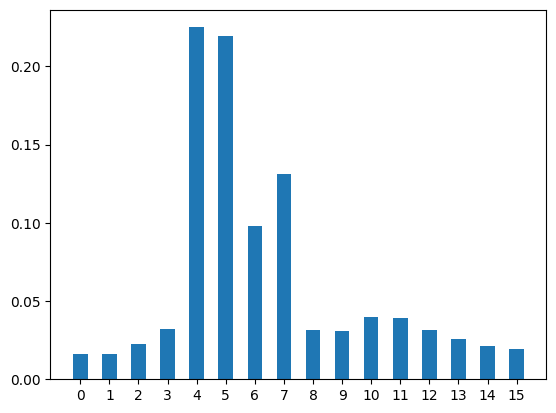



>>> Job ID: cl7qr8h5o5utp9bqebsg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.02445, 14: 0.02112, 2: 0.00865, 11: 0.03729, 13: 0.022, 15: 0.0219, 10: 0.05192, 12: 0.02631, 5: 0.23312, 8: 0.1141, 1: 0.01771, 0: 0.02088, 7: 0.12038, 3: 0.04035, 4: 0.14171, 6: 0.09811}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.02445, 14: 0.02112, 2: 0.00865, 11: 0.03729, 13: 0.022, 15: 0.0219, 10: 0.05192, 12: 0.02631, 5: 0.23312, 8: 0.1141, 1: 0.01771, 0: 0.02088, 7: 0.12038, 3: 0.04035, 4: 0.14171, 6: 0.09811}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
28
{9: 0.02445, 14: 0.02112, 2: 0.00865, 11: 0.03729, 13: 0.022, 15: 0.0219, 10: 0.05192, 12: 0.02631, 5: 0.23312, 8: 0.1141, 1: 0.01771, 0: 0.02088, 7: 0.12038, 3: 0.04035, 4: 0.14171, 6: 0.09811}


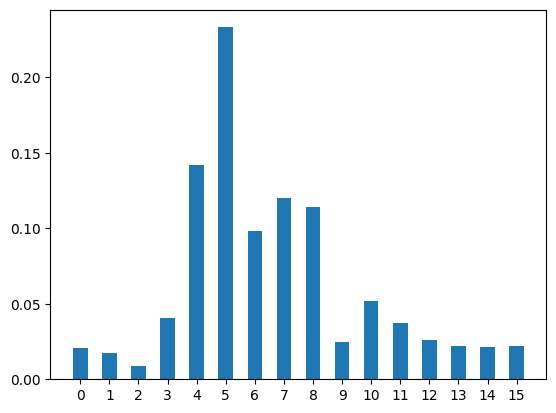



>>> Job ID: cl7qr9f75e3r3c6dsmn0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.02101, 14: 0.02221, 1: 0.02298, 8: 0.0146, 11: 0.02501, 13: 0.02147, 15: 0.02106, 10: 0.05075, 12: 0.02023, 5: 0.3334, 9: 0.12546, 4: 0.03991, 6: 0.09158, 3: 0.04182, 0: 0.02285, 7: 0.12566}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.02101, 14: 0.02221, 1: 0.02298, 8: 0.0146, 11: 0.02501, 13: 0.02147, 15: 0.02106, 10: 0.05075, 12: 0.02023, 5: 0.3334, 9: 0.12546, 4: 0.03991, 6: 0.09158, 3: 0.04182, 0: 0.02285, 7: 0.12566}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
29
{2: 0.02101, 14: 0.02221, 1: 0.02298, 8: 0.0146, 11: 0.02501, 13: 0.02147, 15: 0.02106, 10: 0.05075, 12: 0.02023, 5: 0.3334, 9: 0.12546, 4: 0.03991, 6: 0.09158, 3: 0.04182, 0: 0.02285, 7: 0.12566}


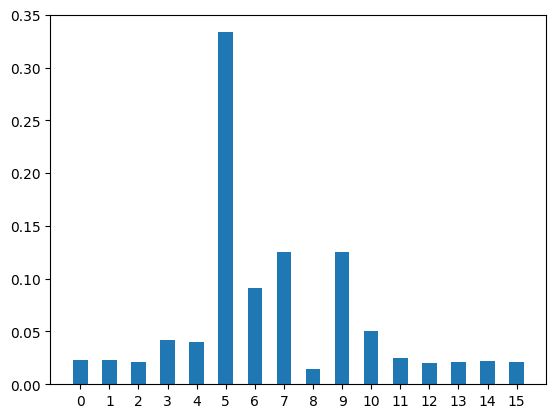



>>> Job ID: cl7qra5fa6vtjv8rtuf0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.02474, 2: 0.02099, 15: 0.02268, 10: 0.03369, 9: 0.12259, 4: 0.05804, 6: 0.07515, 1: 0.01788, 12: 0.021, 5: 0.33418, 8: 0.03122, 11: 0.03527, 0: 0.01902, 3: 0.0298, 7: 0.12639, 13: 0.02736}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.02474, 2: 0.02099, 15: 0.02268, 10: 0.03369, 9: 0.12259, 4: 0.05804, 6: 0.07515, 1: 0.01788, 12: 0.021, 5: 0.33418, 8: 0.03122, 11: 0.03527, 0: 0.01902, 3: 0.0298, 7: 0.12639, 13: 0.02736}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
30
{14: 0.02474, 2: 0.02099, 15: 0.02268, 10: 0.03369, 9: 0.12259, 4: 0.05804, 6: 0.07515, 1: 0.01788, 12: 0.021, 5: 0.33418, 8: 0.03122, 11: 0.03527, 0: 0.01902, 3: 0.0298, 7: 0.12639, 13: 0.02736}


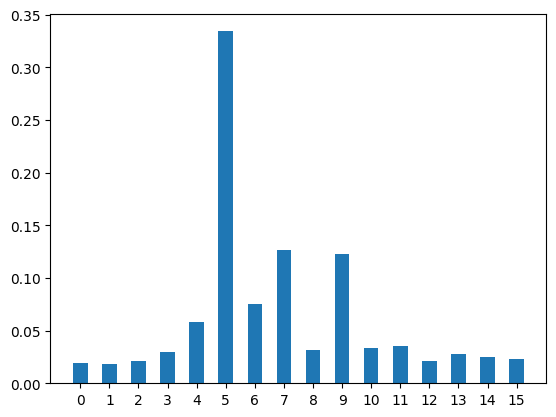



>>> Job ID: cl7qrap6mcdhud4efgq0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.03046, 2: 0.0164, 9: 0.03384, 1: 0.01694, 14: 0.0259, 11: 0.00666, 12: 0.04502, 5: 0.23592, 8: 0.13916, 0: 0.01932, 3: 0.0065, 7: 0.01904, 15: 0.02149, 10: 0.13148, 6: 0.16578, 4: 0.08609}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.03046, 2: 0.0164, 9: 0.03384, 1: 0.01694, 14: 0.0259, 11: 0.00666, 12: 0.04502, 5: 0.23592, 8: 0.13916, 0: 0.01932, 3: 0.0065, 7: 0.01904, 15: 0.02149, 10: 0.13148, 6: 0.16578, 4: 0.08609}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
31
{13: 0.03046, 2: 0.0164, 9: 0.03384, 1: 0.01694, 14: 0.0259, 11: 0.00666, 12: 0.04502, 5: 0.23592, 8: 0.13916, 0: 0.01932, 3: 0.0065, 7: 0.01904, 15: 0.02149, 10: 0.13148, 6: 0.16578, 4: 0.08609}


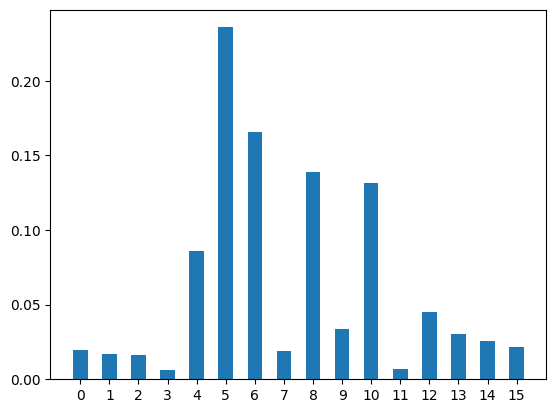



>>> Job ID: cl7qrbv75e3r3c6dso60
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.02224, 1: 0.01876, 2: 0.02047, 10: 0.01064, 15: 0.01964, 7: 0.00168, 3: 0.00867, 0: 0.01943, 4: 0.0858, 6: 0.28758, 13: 0.02704, 8: 0.14065, 11: 0.12729, 5: 0.1123, 12: 0.04617, 9: 0.05164}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.02224, 1: 0.01876, 2: 0.02047, 10: 0.01064, 15: 0.01964, 7: 0.00168, 3: 0.00867, 0: 0.01943, 4: 0.0858, 6: 0.28758, 13: 0.02704, 8: 0.14065, 11: 0.12729, 5: 0.1123, 12: 0.04617, 9: 0.05164}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
32
{14: 0.02224, 1: 0.01876, 2: 0.02047, 10: 0.01064, 15: 0.01964, 7: 0.00168, 3: 0.00867, 0: 0.01943, 4: 0.0858, 6: 0.28758, 13: 0.02704, 8: 0.14065, 11: 0.12729, 5: 0.1123, 12: 0.04617, 9: 0.05164}


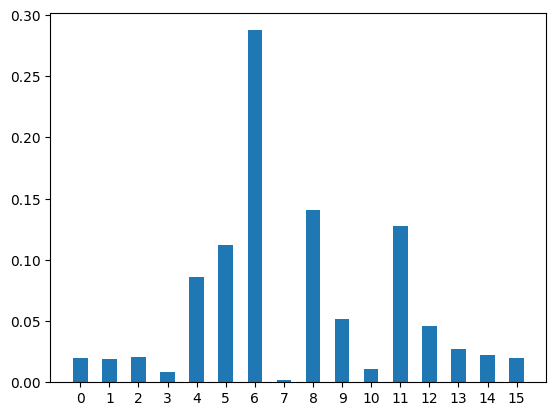



>>> Job ID: cl7qrcp5o5utp9bqee50
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01955, 11: 0.08754, 14: 0.01173, 1: 0.0188, 13: 0.05207, 12: 0.05625, 5: 0.10453, 7: 0.00239, 3: 0.01963, 0: 0.01894, 6: 0.32413, 4: 0.06156, 8: 0.11868, 9: 0.07297, 10: 0.01032, 15: 0.02091}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01955, 11: 0.08754, 14: 0.01173, 1: 0.0188, 13: 0.05207, 12: 0.05625, 5: 0.10453, 7: 0.00239, 3: 0.01963, 0: 0.01894, 6: 0.32413, 4: 0.06156, 8: 0.11868, 9: 0.07297, 10: 0.01032, 15: 0.02091}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
33
{2: 0.01955, 11: 0.08754, 14: 0.01173, 1: 0.0188, 13: 0.05207, 12: 0.05625, 5: 0.10453, 7: 0.00239, 3: 0.01963, 0: 0.01894, 6: 0.32413, 4: 0.06156, 8: 0.11868, 9: 0.07297, 10: 0.01032, 15: 0.02091}


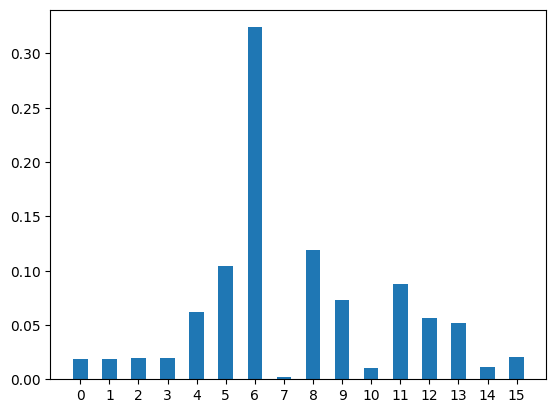



>>> Job ID: cl7qrdlfa6vtjv8ru0og
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.05085, 13: 0.00504, 1: 0.01923, 7: 0.0551, 3: 0.02102, 0: 0.02249, 15: 0.01873, 10: 0.07627, 11: 0.03504, 2: 0.01683, 4: 0.02085, 6: 0.27458, 14: 0.05291, 9: 0.07132, 5: 0.15387, 12: 0.10587}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.05085, 13: 0.00504, 1: 0.01923, 7: 0.0551, 3: 0.02102, 0: 0.02249, 15: 0.01873, 10: 0.07627, 11: 0.03504, 2: 0.01683, 4: 0.02085, 6: 0.27458, 14: 0.05291, 9: 0.07132, 5: 0.15387, 12: 0.10587}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
34
{8: 0.05085, 13: 0.00504, 1: 0.01923, 7: 0.0551, 3: 0.02102, 0: 0.02249, 15: 0.01873, 10: 0.07627, 11: 0.03504, 2: 0.01683, 4: 0.02085, 6: 0.27458, 14: 0.05291, 9: 0.07132, 5: 0.15387, 12: 0.10587}


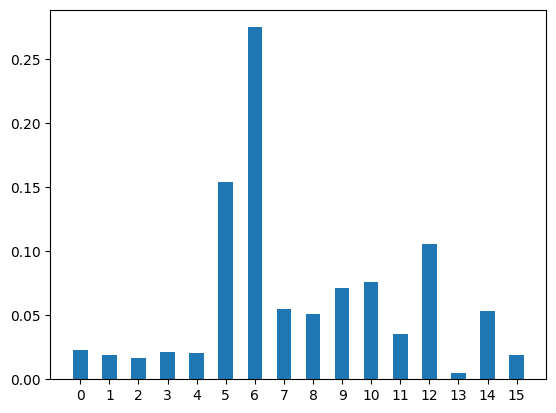



>>> Job ID: cl7qreh6mcdhud4efio0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.03555, 9: 0.03782, 2: 0.01761, 1: 0.01892, 3: 0.02039, 0: 0.0228, 7: 0.13392, 8: 0.0627, 4: 0.00027, 6: 0.17388, 13: 0.10597, 11: 0.02381, 15: 0.03887, 10: 0.11278, 5: 0.16839, 12: 0.02632}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.03555, 9: 0.03782, 2: 0.01761, 1: 0.01892, 3: 0.02039, 0: 0.0228, 7: 0.13392, 8: 0.0627, 4: 0.00027, 6: 0.17388, 13: 0.10597, 11: 0.02381, 15: 0.03887, 10: 0.11278, 5: 0.16839, 12: 0.02632}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
35
{14: 0.03555, 9: 0.03782, 2: 0.01761, 1: 0.01892, 3: 0.02039, 0: 0.0228, 7: 0.13392, 8: 0.0627, 4: 0.00027, 6: 0.17388, 13: 0.10597, 11: 0.02381, 15: 0.03887, 10: 0.11278, 5: 0.16839, 12: 0.02632}


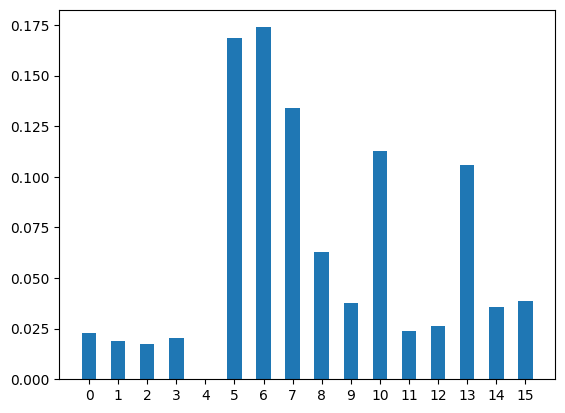



>>> Job ID: cl7qrfd7pau17fl1hfj0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01936, 9: 0.03826, 13: 0.05763, 11: 0.02396, 8: 0.07443, 3: 0.01925, 0: 0.013, 7: 0.18414, 4: 0.0097, 6: 0.14314, 2: 0.01676, 12: 0.01507, 5: 0.13818, 10: 0.11261, 15: 0.06875, 14: 0.06576}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01936, 9: 0.03826, 13: 0.05763, 11: 0.02396, 8: 0.07443, 3: 0.01925, 0: 0.013, 7: 0.18414, 4: 0.0097, 6: 0.14314, 2: 0.01676, 12: 0.01507, 5: 0.13818, 10: 0.11261, 15: 0.06875, 14: 0.06576}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
36
{1: 0.01936, 9: 0.03826, 13: 0.05763, 11: 0.02396, 8: 0.07443, 3: 0.01925, 0: 0.013, 7: 0.18414, 4: 0.0097, 6: 0.14314, 2: 0.01676, 12: 0.01507, 5: 0.13818, 10: 0.11261, 15: 0.06875, 14: 0.06576}


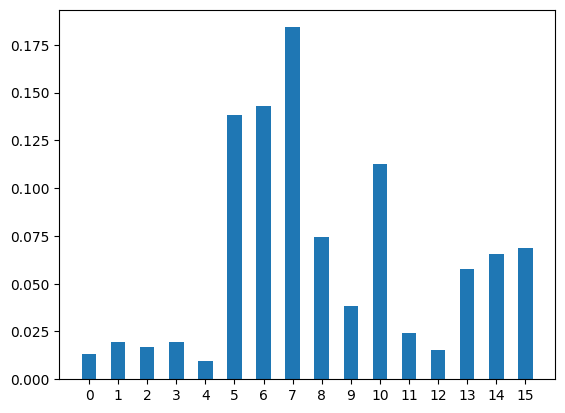



>>> Job ID: cl7qrg16mcdhud4efjog
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00586, 2: 0.02012, 9: 0.0327, 11: 0.0717, 12: 0.01981, 5: 0.07715, 14: 0.05925, 4: 0.02411, 6: 0.19847, 13: 0.06303, 0: 0.07475, 3: 0.01707, 7: 0.18841, 10: 0.06391, 15: 0.01374, 8: 0.06992}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00586, 2: 0.02012, 9: 0.0327, 11: 0.0717, 12: 0.01981, 5: 0.07715, 14: 0.05925, 4: 0.02411, 6: 0.19847, 13: 0.06303, 0: 0.07475, 3: 0.01707, 7: 0.18841, 10: 0.06391, 15: 0.01374, 8: 0.06992}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
37
{1: 0.00586, 2: 0.02012, 9: 0.0327, 11: 0.0717, 12: 0.01981, 5: 0.07715, 14: 0.05925, 4: 0.02411, 6: 0.19847, 13: 0.06303, 0: 0.07475, 3: 0.01707, 7: 0.18841, 10: 0.06391, 15: 0.01374, 8: 0.06992}


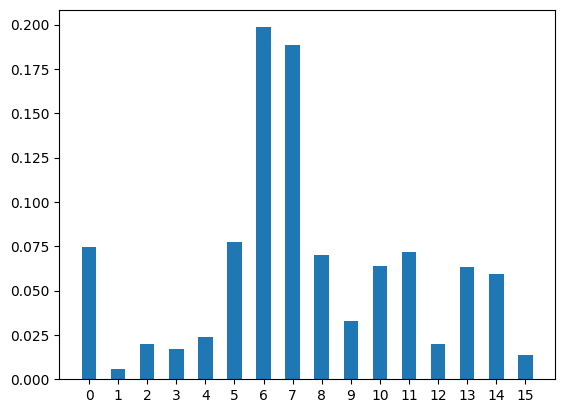



>>> Job ID: cl7qrh15o5utp9bqegng
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00983, 9: 0.08421, 11: 0.07235, 1: 0.06013, 2: 0.01343, 4: 0.03001, 6: 0.25136, 14: 0.06716, 10: 0.00654, 15: 0.05621, 3: 0.0165, 7: 0.14898, 0: 0.02044, 5: 0.02119, 12: 0.07926, 8: 0.0624}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00983, 9: 0.08421, 11: 0.07235, 1: 0.06013, 2: 0.01343, 4: 0.03001, 6: 0.25136, 14: 0.06716, 10: 0.00654, 15: 0.05621, 3: 0.0165, 7: 0.14898, 0: 0.02044, 5: 0.02119, 12: 0.07926, 8: 0.0624}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
38
{13: 0.00983, 9: 0.08421, 11: 0.07235, 1: 0.06013, 2: 0.01343, 4: 0.03001, 6: 0.25136, 14: 0.06716, 10: 0.00654, 15: 0.05621, 3: 0.0165, 7: 0.14898, 0: 0.02044, 5: 0.02119, 12: 0.07926, 8: 0.0624}


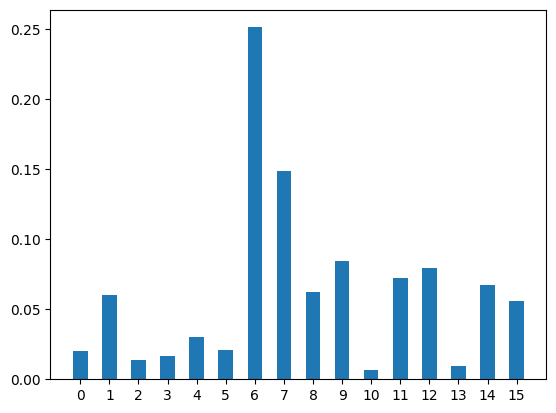



>>> Job ID: cl7qrid7pau17fl1hhf0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.03187, 13: 0.01339, 5: 0.0034, 12: 0.08291, 14: 0.00852, 10: 0.00219, 15: 0.06602, 1: 0.06271, 9: 0.14039, 3: 0.01752, 7: 0.12204, 0: 0.04897, 6: 0.25227, 4: 0.02815, 11: 0.06779, 8: 0.05186}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.03187, 13: 0.01339, 5: 0.0034, 12: 0.08291, 14: 0.00852, 10: 0.00219, 15: 0.06602, 1: 0.06271, 9: 0.14039, 3: 0.01752, 7: 0.12204, 0: 0.04897, 6: 0.25227, 4: 0.02815, 11: 0.06779, 8: 0.05186}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
39
{2: 0.03187, 13: 0.01339, 5: 0.0034, 12: 0.08291, 14: 0.00852, 10: 0.00219, 15: 0.06602, 1: 0.06271, 9: 0.14039, 3: 0.01752, 7: 0.12204, 0: 0.04897, 6: 0.25227, 4: 0.02815, 11: 0.06779, 8: 0.05186}


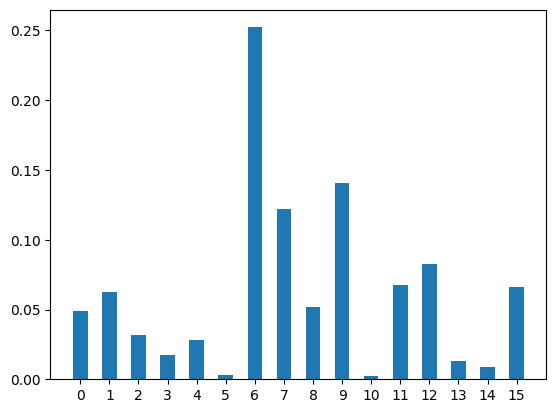



>>> Job ID: cl7qrj96mcdhud4eflj0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0189, 14: 0.00797, 13: 0.02799, 11: 0.05311, 9: 0.15467, 2: 0.09242, 4: 0.02911, 6: 0.19443, 3: 0.00538, 0: 0.04521, 7: 0.16102, 10: 0.00297, 15: 0.05348, 8: 0.05588, 5: 0.01561, 12: 0.08185}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0189, 14: 0.00797, 13: 0.02799, 11: 0.05311, 9: 0.15467, 2: 0.09242, 4: 0.02911, 6: 0.19443, 3: 0.00538, 0: 0.04521, 7: 0.16102, 10: 0.00297, 15: 0.05348, 8: 0.05588, 5: 0.01561, 12: 0.08185}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
40
{1: 0.0189, 14: 0.00797, 13: 0.02799, 11: 0.05311, 9: 0.15467, 2: 0.09242, 4: 0.02911, 6: 0.19443, 3: 0.00538, 0: 0.04521, 7: 0.16102, 10: 0.00297, 15: 0.05348, 8: 0.05588, 5: 0.01561, 12: 0.08185}


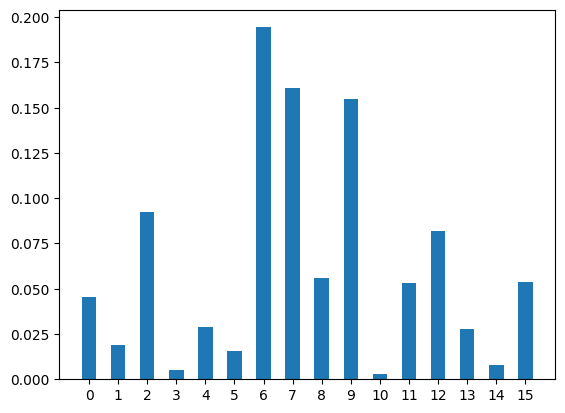



>>> Job ID: cl7qrkf75e3r3c6dssl0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00562, 8: 0.05503, 13: 0.07388, 11: 0.02791, 12: 0.03716, 5: 0.04271, 14: 0.03385, 9: 0.12023, 4: 0.00188, 6: 0.10441, 3: 0.09327, 0: 0.07732, 7: 0.2504, 15: 0.02312, 10: 0.03512, 1: 0.01809}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00562, 8: 0.05503, 13: 0.07388, 11: 0.02791, 12: 0.03716, 5: 0.04271, 14: 0.03385, 9: 0.12023, 4: 0.00188, 6: 0.10441, 3: 0.09327, 0: 0.07732, 7: 0.2504, 15: 0.02312, 10: 0.03512, 1: 0.01809}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
41
{2: 0.00562, 8: 0.05503, 13: 0.07388, 11: 0.02791, 12: 0.03716, 5: 0.04271, 14: 0.03385, 9: 0.12023, 4: 0.00188, 6: 0.10441, 3: 0.09327, 0: 0.07732, 7: 0.2504, 15: 0.02312, 10: 0.03512, 1: 0.01809}


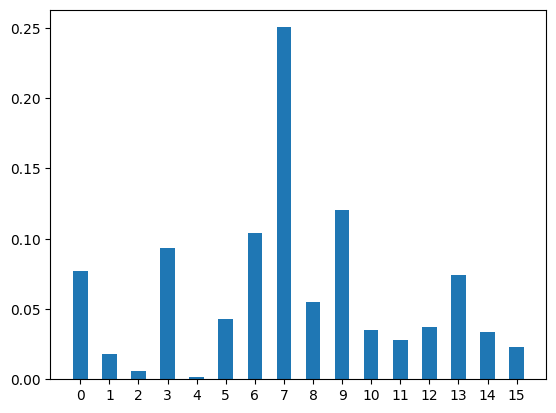



>>> Job ID: cl7qrl96mcdhud4efmqg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0805, 13: 0.07333, 2: 0.01593, 8: 0.04588, 11: 0.04064, 9: 0.05786, 0: 0.01979, 3: 0.03329, 7: 0.3095, 15: 0.00865, 10: 0.09226, 6: 0.04226, 4: 0.06438, 14: 0.06448, 5: 0.04328, 12: 0.00797}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0805, 13: 0.07333, 2: 0.01593, 8: 0.04588, 11: 0.04064, 9: 0.05786, 0: 0.01979, 3: 0.03329, 7: 0.3095, 15: 0.00865, 10: 0.09226, 6: 0.04226, 4: 0.06438, 14: 0.06448, 5: 0.04328, 12: 0.00797}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
42
{1: 0.0805, 13: 0.07333, 2: 0.01593, 8: 0.04588, 11: 0.04064, 9: 0.05786, 0: 0.01979, 3: 0.03329, 7: 0.3095, 15: 0.00865, 10: 0.09226, 6: 0.04226, 4: 0.06438, 14: 0.06448, 5: 0.04328, 12: 0.00797}


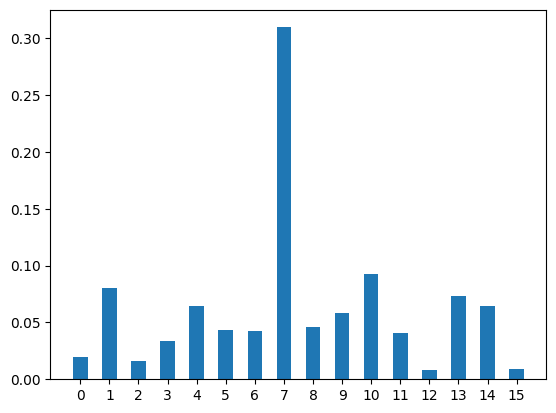



>>> Job ID: cl7qrmf75e3r3c6dstr0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01175, 1: 0.03673, 6: 0.02782, 4: 0.06746, 11: 0.05375, 13: 0.07456, 3: 0.01283, 0: 0.00728, 7: 0.30523, 15: 0.0093, 10: 0.13619, 2: 0.0617, 14: 0.06422, 12: 0.00772, 5: 0.05686, 8: 0.0666}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01175, 1: 0.03673, 6: 0.02782, 4: 0.06746, 11: 0.05375, 13: 0.07456, 3: 0.01283, 0: 0.00728, 7: 0.30523, 15: 0.0093, 10: 0.13619, 2: 0.0617, 14: 0.06422, 12: 0.00772, 5: 0.05686, 8: 0.0666}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
43
{9: 0.01175, 1: 0.03673, 6: 0.02782, 4: 0.06746, 11: 0.05375, 13: 0.07456, 3: 0.01283, 0: 0.00728, 7: 0.30523, 15: 0.0093, 10: 0.13619, 2: 0.0617, 14: 0.06422, 12: 0.00772, 5: 0.05686, 8: 0.0666}


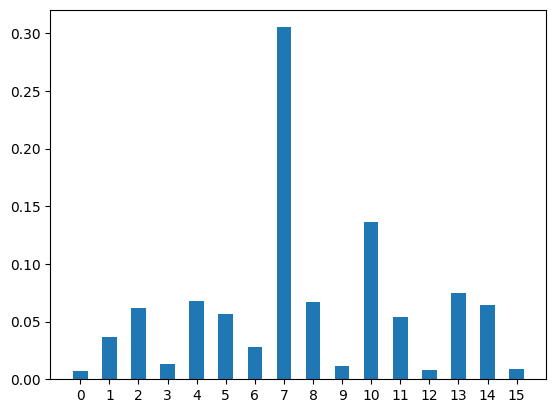



>>> Job ID: cl7qrndfa6vtjv8ru630
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00066, 1: 0.03897, 11: 0.05019, 4: 0.00059, 6: 0.02739, 13: 0.04316, 2: 0.05286, 0: 0.00677, 3: 0.02402, 7: 0.24296, 8: 0.13188, 12: 0.00907, 5: 0.1205, 14: 0.06404, 10: 0.14863, 15: 0.03831}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00066, 1: 0.03897, 11: 0.05019, 4: 0.00059, 6: 0.02739, 13: 0.04316, 2: 0.05286, 0: 0.00677, 3: 0.02402, 7: 0.24296, 8: 0.13188, 12: 0.00907, 5: 0.1205, 14: 0.06404, 10: 0.14863, 15: 0.03831}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
44
{9: 0.00066, 1: 0.03897, 11: 0.05019, 4: 0.00059, 6: 0.02739, 13: 0.04316, 2: 0.05286, 0: 0.00677, 3: 0.02402, 7: 0.24296, 8: 0.13188, 12: 0.00907, 5: 0.1205, 14: 0.06404, 10: 0.14863, 15: 0.03831}


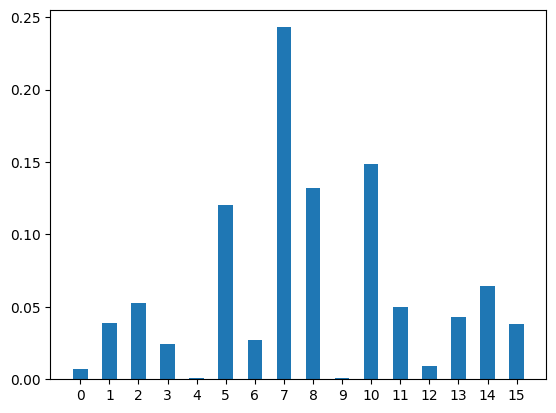



>>> Job ID: cl7qrofl4q34kqgkeptg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00084, 14: 0.03356, 13: 0.01051, 11: 0.05073, 10: 0.11049, 15: 0.06796, 5: 0.0002, 12: 0.04192, 8: 0.25587, 1: 0.00762, 4: 0.00062, 6: 0.13573, 2: 0.05254, 3: 0.05841, 0: 0.03951, 7: 0.13349}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00084, 14: 0.03356, 13: 0.01051, 11: 0.05073, 10: 0.11049, 15: 0.06796, 5: 0.0002, 12: 0.04192, 8: 0.25587, 1: 0.00762, 4: 0.00062, 6: 0.13573, 2: 0.05254, 3: 0.05841, 0: 0.03951, 7: 0.13349}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
45
{9: 0.00084, 14: 0.03356, 13: 0.01051, 11: 0.05073, 10: 0.11049, 15: 0.06796, 5: 0.0002, 12: 0.04192, 8: 0.25587, 1: 0.00762, 4: 0.00062, 6: 0.13573, 2: 0.05254, 3: 0.05841, 0: 0.03951, 7: 0.13349}


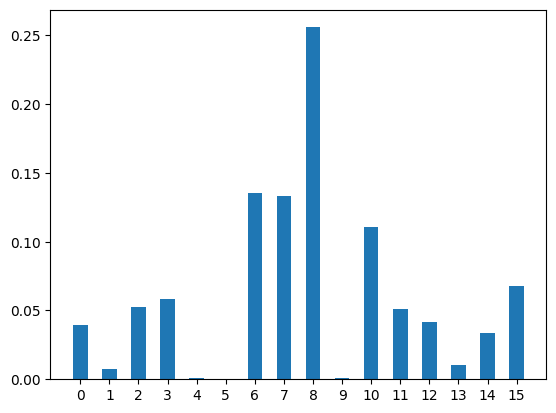



>>> Job ID: cl7qrq5fa6vtjv8ru7f0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00046, 2: 0.00523, 11: 0.05851, 1: 0.00841, 13: 0.00934, 3: 0.04908, 0: 0.04976, 7: 0.13443, 4: 0.05764, 6: 0.10939, 14: 0.02261, 8: 0.28206, 10: 0.05477, 15: 0.07051, 5: 0.0004, 12: 0.0874}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00046, 2: 0.00523, 11: 0.05851, 1: 0.00841, 13: 0.00934, 3: 0.04908, 0: 0.04976, 7: 0.13443, 4: 0.05764, 6: 0.10939, 14: 0.02261, 8: 0.28206, 10: 0.05477, 15: 0.07051, 5: 0.0004, 12: 0.0874}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
46
{9: 0.00046, 2: 0.00523, 11: 0.05851, 1: 0.00841, 13: 0.00934, 3: 0.04908, 0: 0.04976, 7: 0.13443, 4: 0.05764, 6: 0.10939, 14: 0.02261, 8: 0.28206, 10: 0.05477, 15: 0.07051, 5: 0.0004, 12: 0.0874}


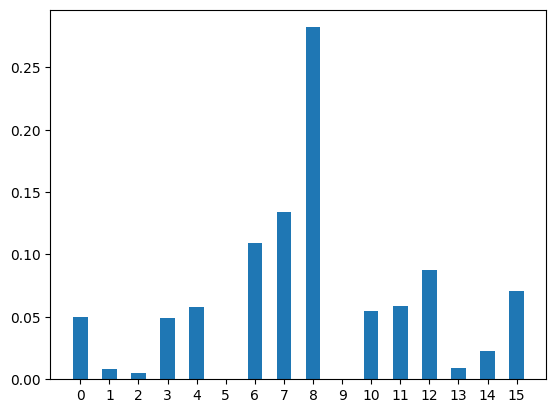



>>> Job ID: cl7qrrf75e3r3c6dt0ig
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.0108, 11: 0.0706, 15: 0.06426, 10: 0.0234, 14: 0.02049, 4: 0.0444, 6: 0.05052, 2: 0.00445, 8: 0.34584, 9: 0.05925, 5: 0.03168, 12: 0.10805, 13: 0.00916, 3: 0.02957, 0: 0.05558, 7: 0.07195}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.0108, 11: 0.0706, 15: 0.06426, 10: 0.0234, 14: 0.02049, 4: 0.0444, 6: 0.05052, 2: 0.00445, 8: 0.34584, 9: 0.05925, 5: 0.03168, 12: 0.10805, 13: 0.00916, 3: 0.02957, 0: 0.05558, 7: 0.07195}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
47
{1: 0.0108, 11: 0.0706, 15: 0.06426, 10: 0.0234, 14: 0.02049, 4: 0.0444, 6: 0.05052, 2: 0.00445, 8: 0.34584, 9: 0.05925, 5: 0.03168, 12: 0.10805, 13: 0.00916, 3: 0.02957, 0: 0.05558, 7: 0.07195}


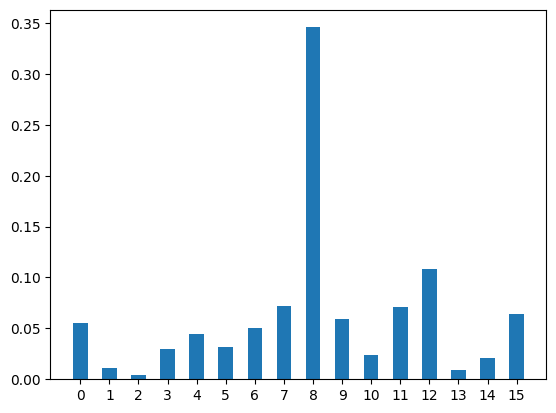



>>> Job ID: cl7qrsp5o5utp9bqen2g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.01145, 13: 0.01887, 15: 0.03049, 10: 0.03381, 4: 0.05729, 6: 0.04218, 9: 0.04203, 11: 0.08344, 8: 0.34362, 1: 0.04588, 12: 0.09515, 5: 0.02031, 14: 0.01415, 0: 0.05283, 3: 0.02161, 7: 0.08689}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.01145, 13: 0.01887, 15: 0.03049, 10: 0.03381, 4: 0.05729, 6: 0.04218, 9: 0.04203, 11: 0.08344, 8: 0.34362, 1: 0.04588, 12: 0.09515, 5: 0.02031, 14: 0.01415, 0: 0.05283, 3: 0.02161, 7: 0.08689}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
48
{2: 0.01145, 13: 0.01887, 15: 0.03049, 10: 0.03381, 4: 0.05729, 6: 0.04218, 9: 0.04203, 11: 0.08344, 8: 0.34362, 1: 0.04588, 12: 0.09515, 5: 0.02031, 14: 0.01415, 0: 0.05283, 3: 0.02161, 7: 0.08689}


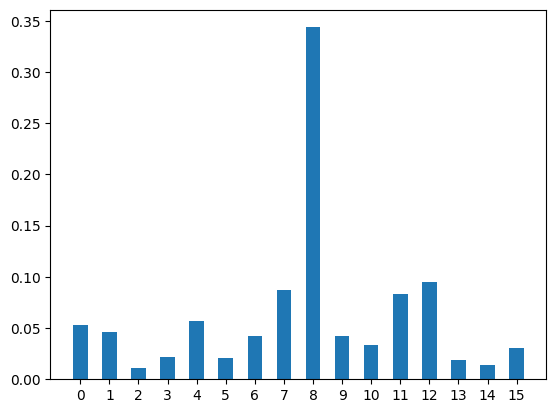



>>> Job ID: cl7qrtn75e3r3c6dt1og
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{15: 0.00273, 10: 0.03762, 14: 0.03003, 2: 0.0389, 11: 0.07319, 12: 0.05676, 5: 0.06083, 8: 0.1251, 1: 0.06309, 13: 0.05133, 4: 0.02337, 6: 0.05096, 3: 0.00451, 7: 0.08629, 0: 0.0347, 9: 0.26059}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {15: 0.00273, 10: 0.03762, 14: 0.03003, 2: 0.0389, 11: 0.07319, 12: 0.05676, 5: 0.06083, 8: 0.1251, 1: 0.06309, 13: 0.05133, 4: 0.02337, 6: 0.05096, 3: 0.00451, 7: 0.08629, 0: 0.0347, 9: 0.26059}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
49
{15: 0.00273, 10: 0.03762, 14: 0.03003, 2: 0.0389, 11: 0.07319, 12: 0.05676, 5: 0.06083, 8: 0.1251, 1: 0.06309, 13: 0.05133, 4: 0.02337, 6: 0.05096, 3: 0.00451, 7: 0.08629, 0: 0.0347, 9: 0.26059}


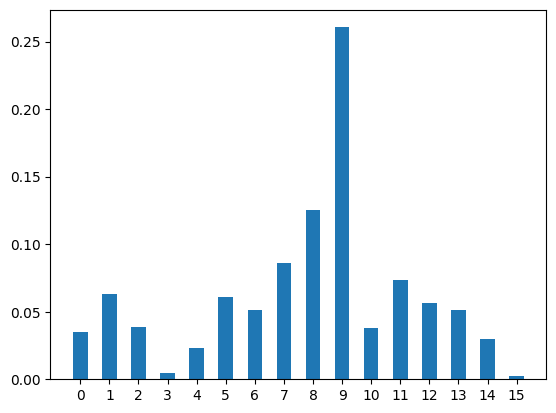

In [ ]:
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  job = sampler.run(circuit, shots=100000)
  print(f">>> Job ID: {job.job_id()}")
  print(f">>> Job Status: {job.status()}")

  result = job.result()
  print(f">>> {result}")
  print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
  print(f"  > Metadata: {result.metadata[0]}")

  print(N)
  cnts = dict(result.quasi_dists[0])
  print(cnts)

  board = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  prob = []
  for i in range(16):
    prob.append(cnts.get(i, 0))

  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

#4. Adding Chutes and Ladders in Board

1) Chutes & Ladder Operator (Notated CL)

Chutes & Ladder Operator

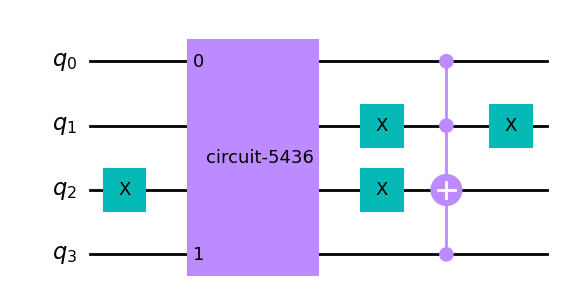

In [ ]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

Verifying Chutes & Ladder Operator (3 <-> 10)

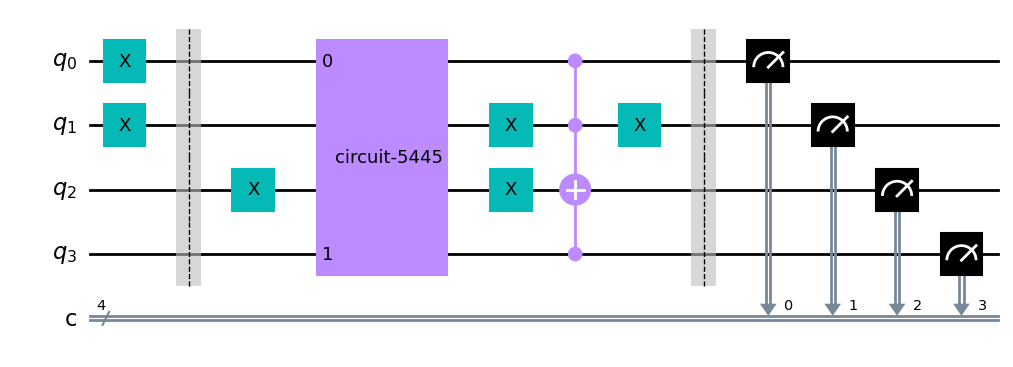

In [ ]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl7qrutfa6vtjv8ru9vg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


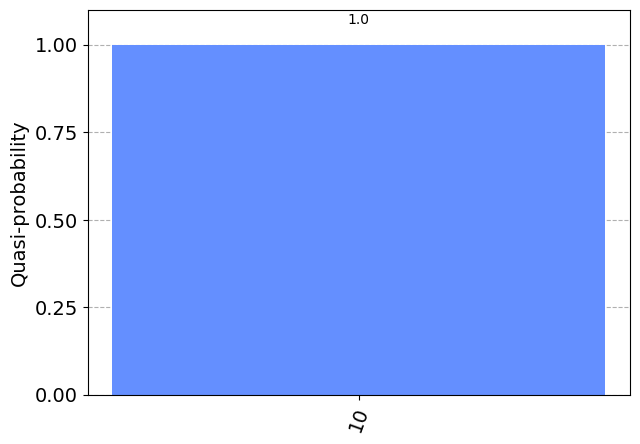

In [ ]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 3 <-> 10
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying Chutes & Ladder Operator (9 <-> 13)

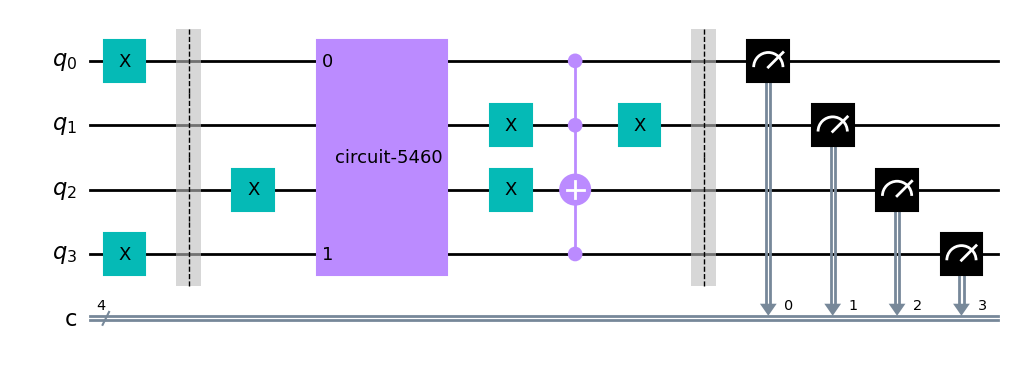

In [ ]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(3)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl7qrvl7pau17fl1hp50
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


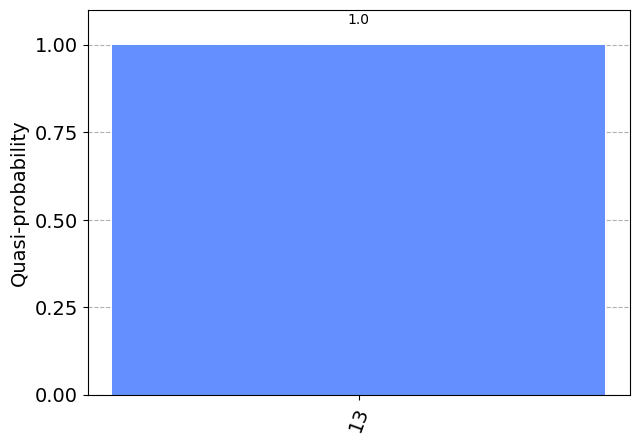

In [ ]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 9 <-> 13
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

Verifying Chutes & Ladder Operator (7 <-> 7)

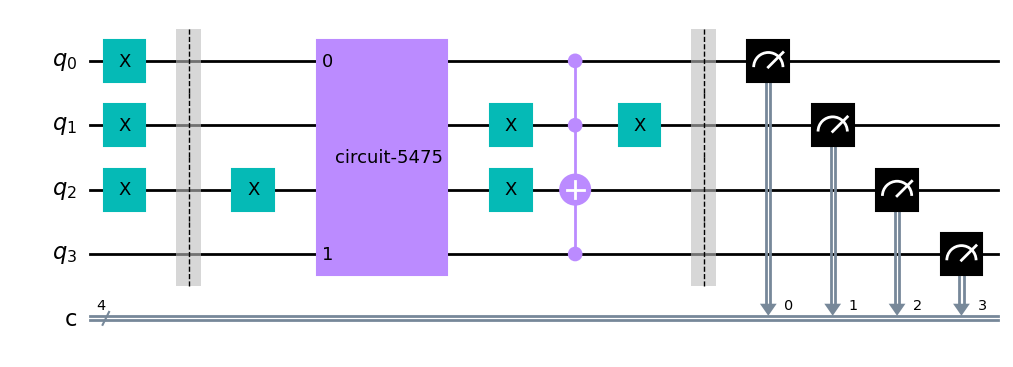

In [ ]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)
CL.x(2)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL.draw("mpl")

>>> Job ID: cl7qs0d7pau17fl1hpm0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{7: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {7: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


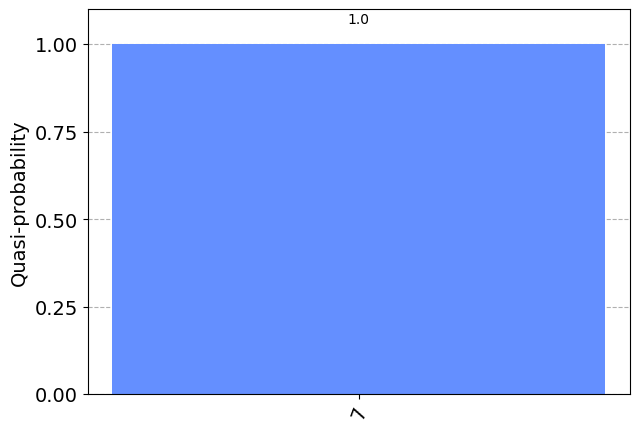

In [ ]:
job = sampler.run(CL, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

# Verifying Chutes & Ladder Operator. 7 <-> 7
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Chutes & Ladders Board Evolution Operator

Chutes & Ladder Operator

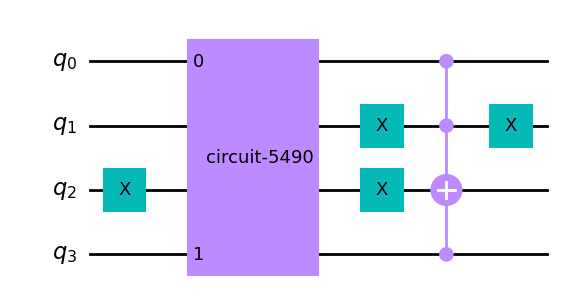

In [ ]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

1 Step Chutes & Ladders Board Evolution Operator

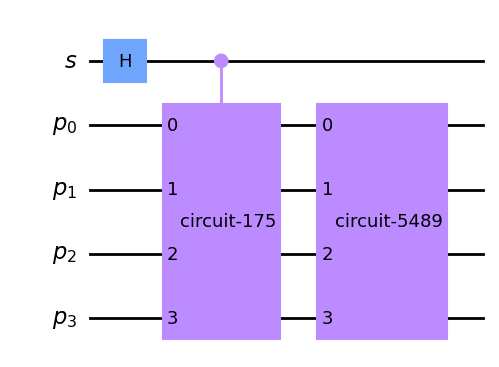

In [ ]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])
circuit.append(CL, [p0, p1, p2, p3])

circuit.draw("mpl")

#5. Discussion

1) Role of Measurement in Quantum Chutes and Ladders Game

State measurement makes wave function collapse. Collapse of wave function arises randomness of Quantum Chutes and Ladders Game.

2) Measurement between Turns

Repetition of measurement and initializaing states is just repetition of 1 step evolution. Repetition of measurement can obtain probability of each state after 1 step evolution.

3) No Measurement between Turns

No measurement makes unitary evolution by each step. This procedure can obtain quantum superposition of states.

4) Quantum Analog of the "Memoryless" Nature of the Classical Game?

Quantum walks are quantum analogues of classical random walks.

Classical Walk : Walker occupy definite states and randomness arises from stocastic transitions defined by Markov's Process.

Quantum Walk : Randomness arises through quantum superposition of states, non-random, reversible unitary evolution and collapse of the wave function due to state measurements.

#6. Compare between #3 & #4 (10 Step)

1) Task 3 (Not Containing Chutes & Ladders)

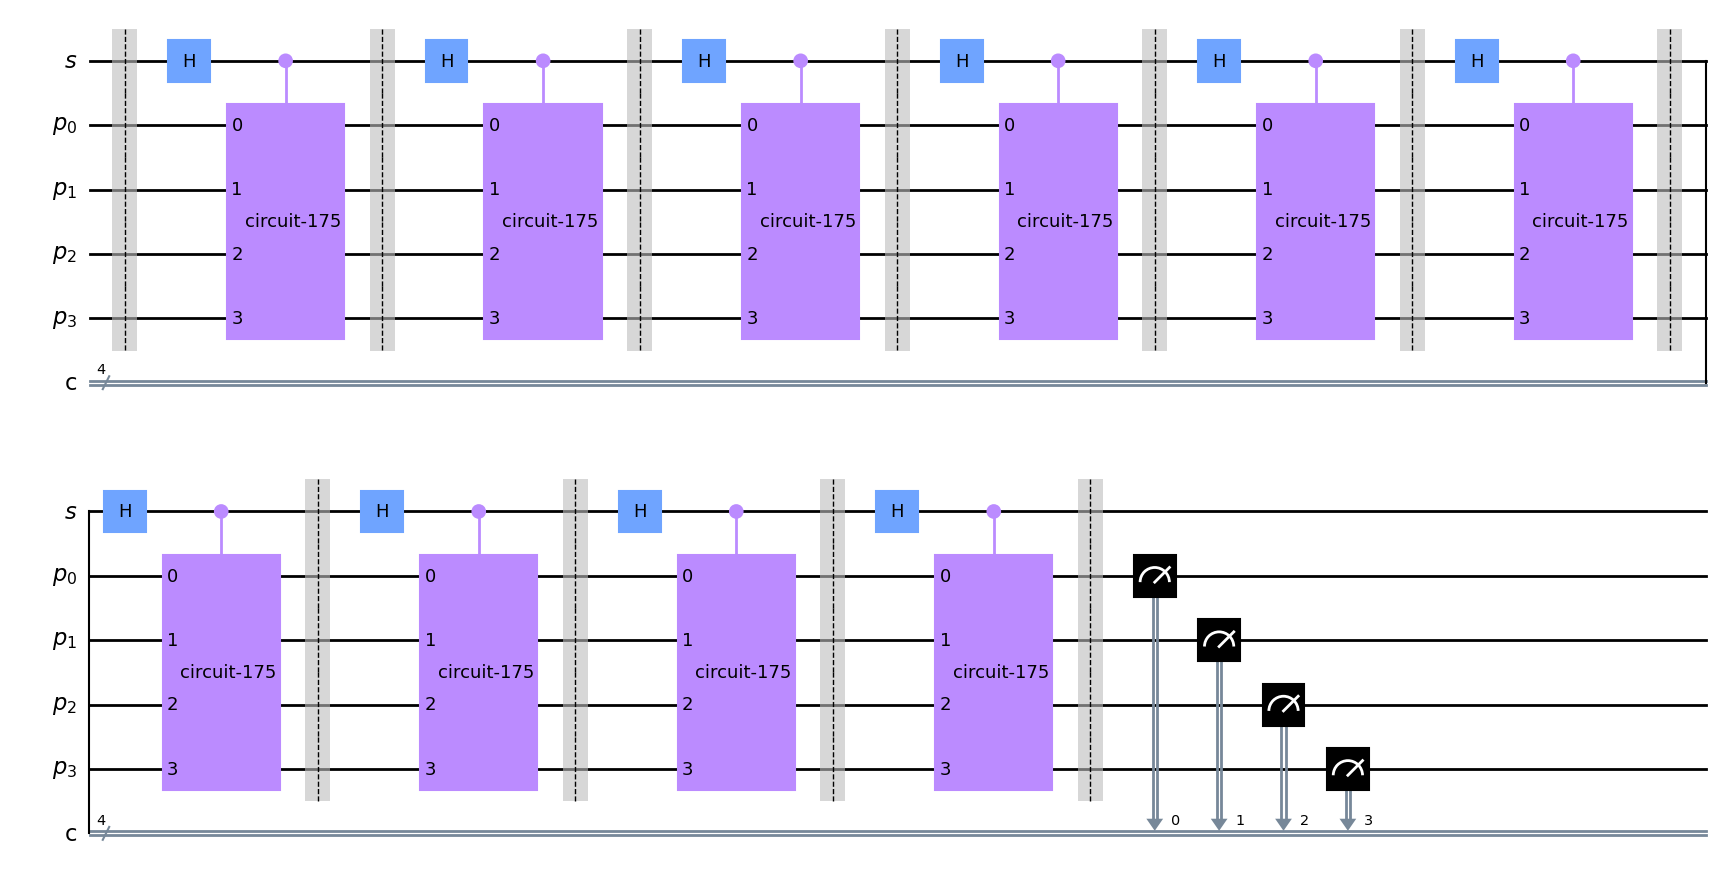

In [ ]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl7qs1775e3r3c6dt3hg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.00092, 1: 0.07913, 5: 0.07099, 9: 0.04899, 0: 0.00097, 3: 0.06244, 7: 0.06331, 2: 0.43759, 6: 0.05159, 4: 0.09754, 8: 0.08653}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.00092, 1: 0.07913, 5: 0.07099, 9: 0.04899, 0: 0.00097, 3: 0.06244, 7: 0.06331, 2: 0.43759, 6: 0.05159, 4: 0.09754, 8: 0.08653}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

10


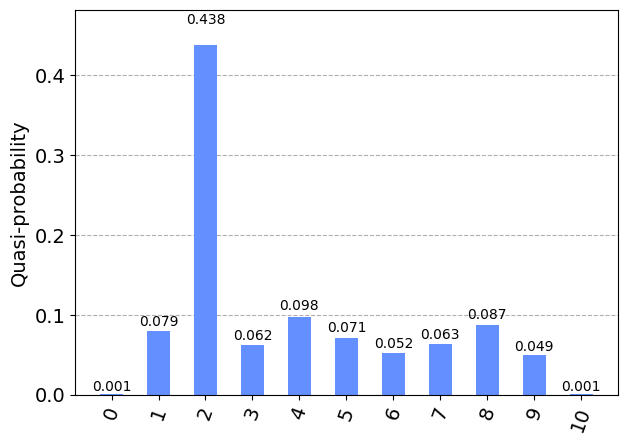

In [ ]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Task 4 (Not Containing Chutes & Ladders)

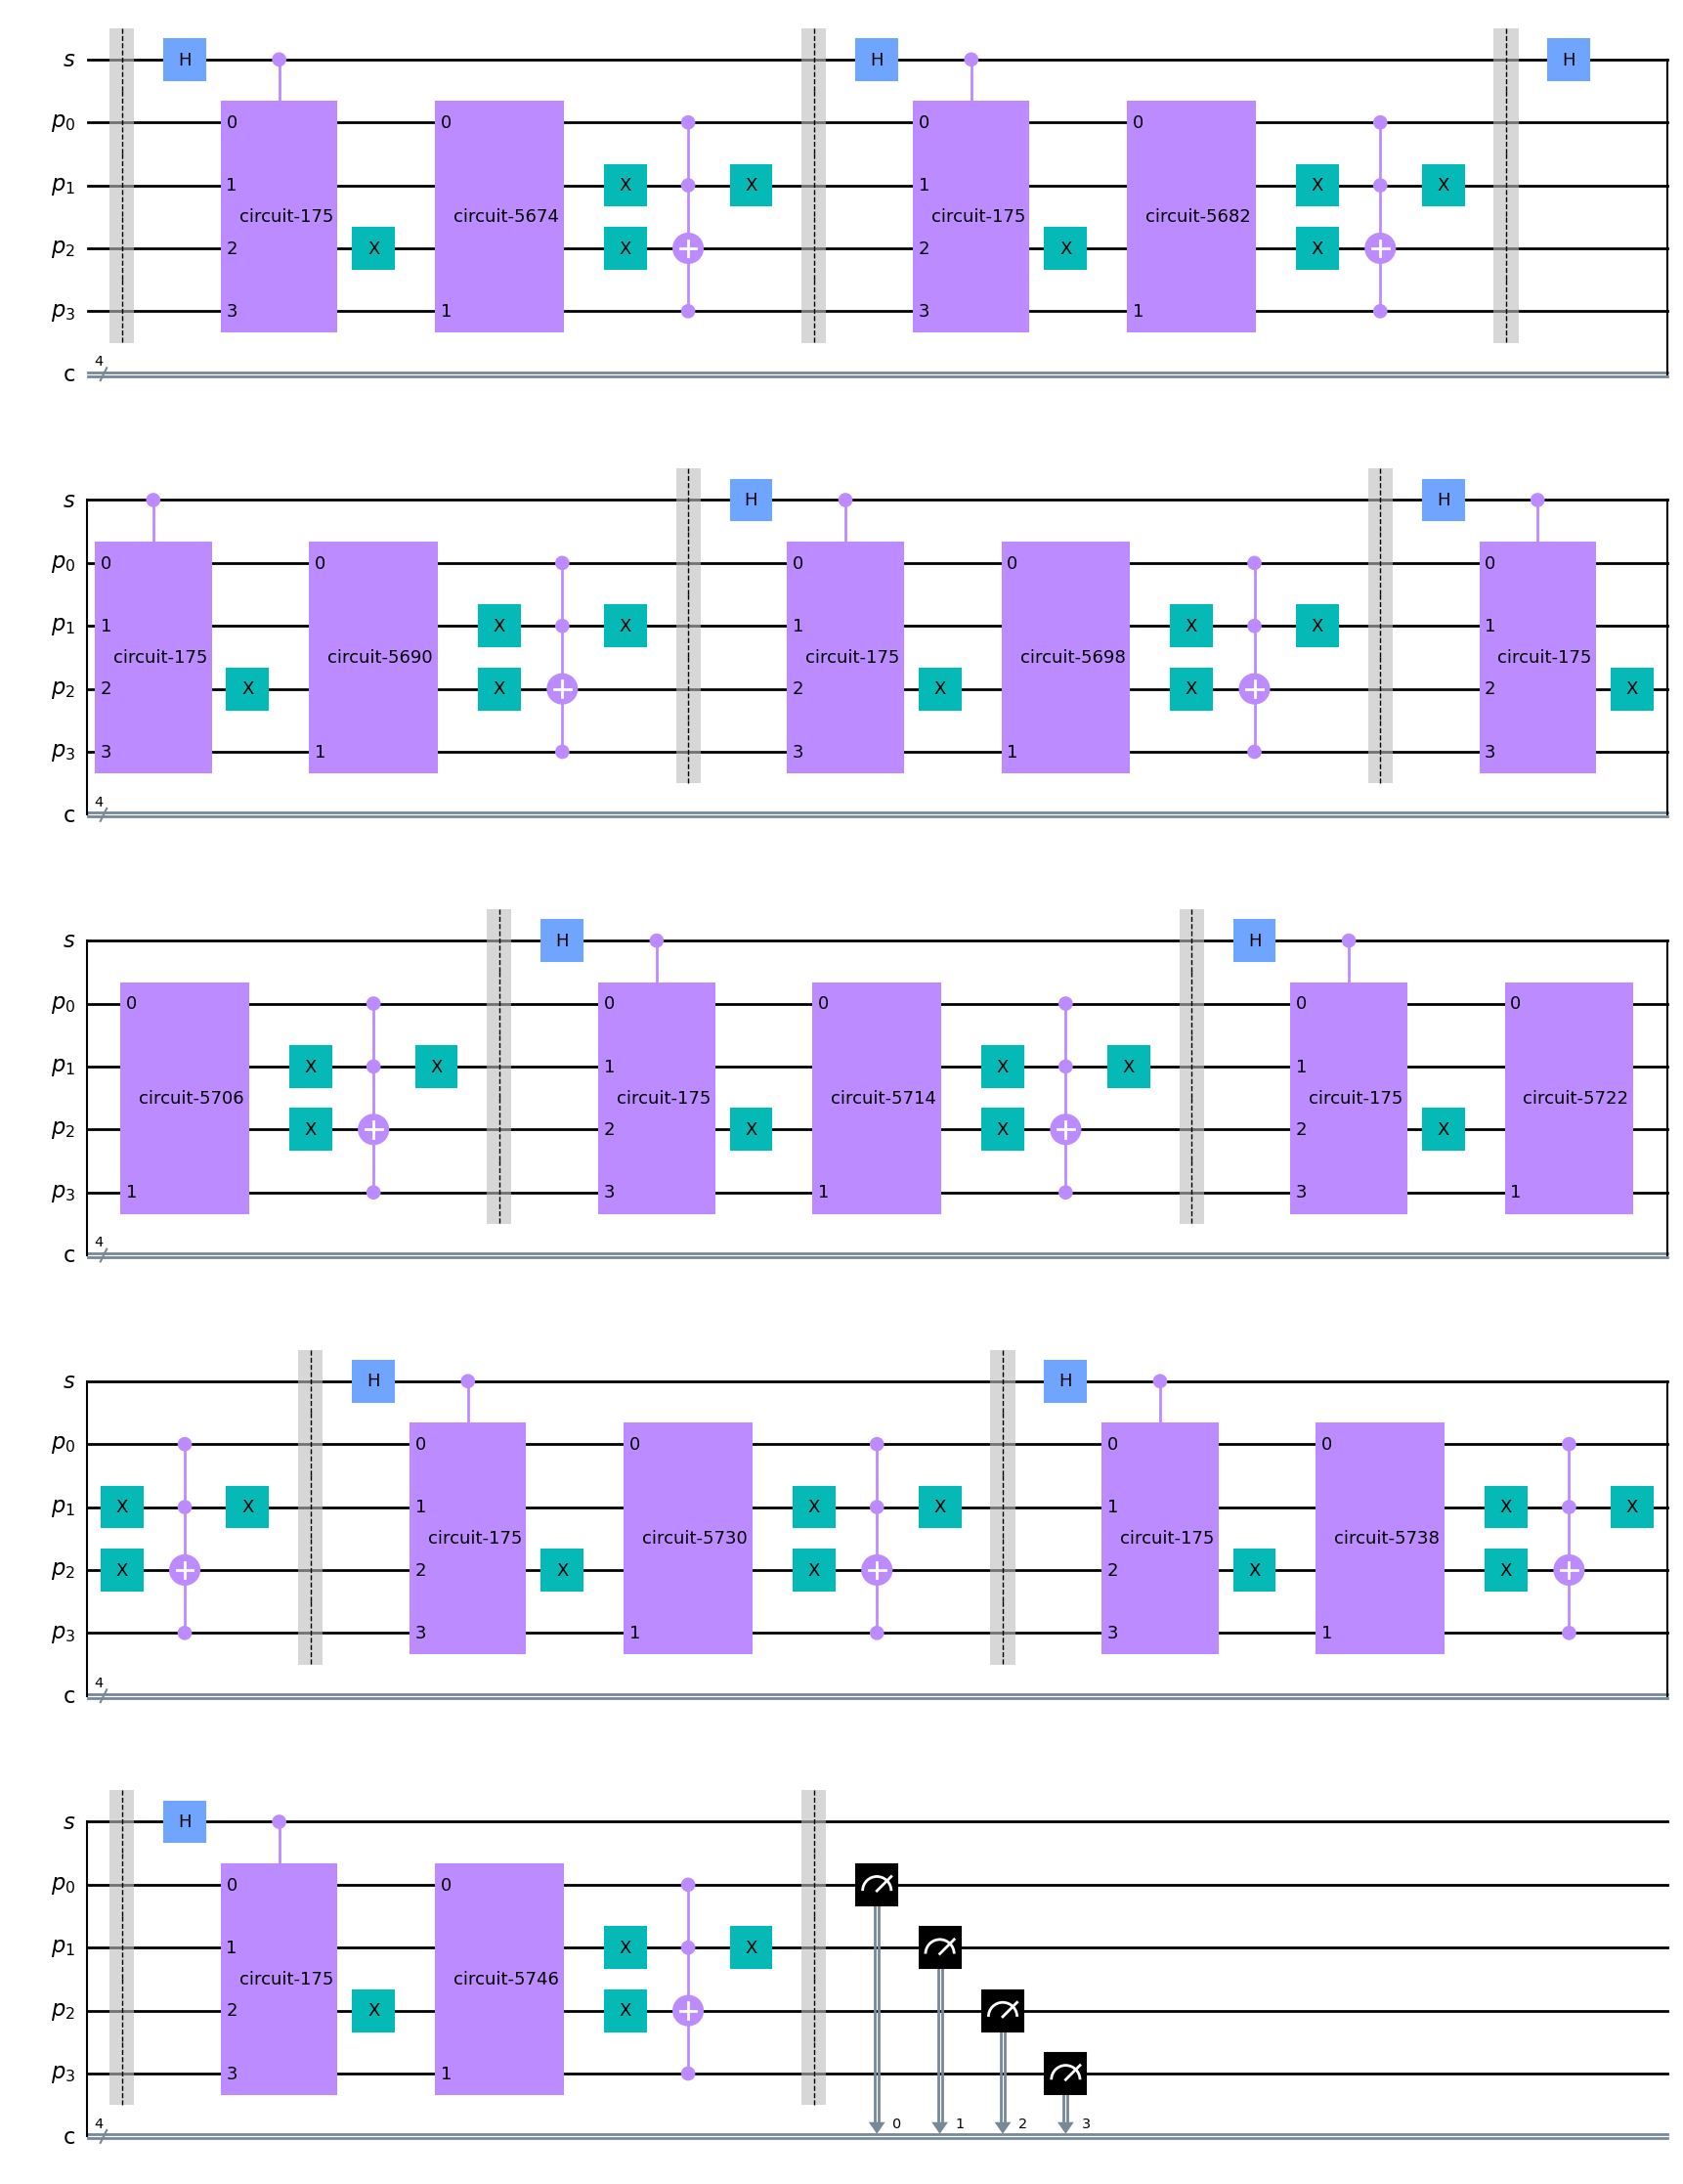

In [ ]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

  qc1 = QuantumCircuit(2)
  qc1.swap(0,1)
  CSwapgate = qc1.to_gate().control(2)

  circuit.x(p2)
  circuit.append(CSwapgate, [p1,p2,p0,p3])
  circuit.x(p2)
  circuit.x(p1)
  circuit.append(C3XGate(), [p0,p1,p3,p2])
  circuit.x(p1)

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit.draw("mpl")

>>> Job ID: cl7qs25fa6vtjv8rubs0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.0098, 5: 0.05887, 12: 0.05055, 14: 0.00504, 11: 0.08119, 9: 0.03644, 6: 0.00476, 4: 0.01896, 2: 0.43797, 1: 0.08095, 8: 0.02518, 0: 0.00187, 3: 0.08018, 7: 0.01342, 15: 0.01727, 10: 0.07755}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.0098, 5: 0.05887, 12: 0.05055, 14: 0.00504, 11: 0.08119, 9: 0.03644, 6: 0.00476, 4: 0.01896, 2: 0.43797, 1: 0.08095, 8: 0.02518, 0: 0.00187, 3: 0.08018, 7: 0.01342, 15: 0.01727, 10: 0.07755}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}

10


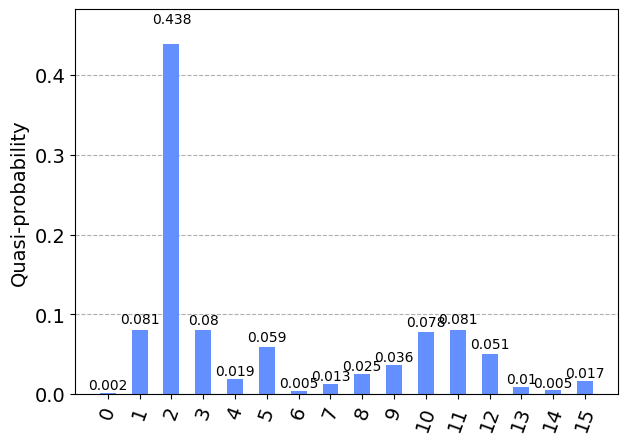

In [ ]:
job = sampler.run(circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print()
print(N)
cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

3) N Step Board Operator Containing Chutes & Ladders

>>> Job ID: cl7qs2t7pau17fl1hre0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
0
{0: 1.0}


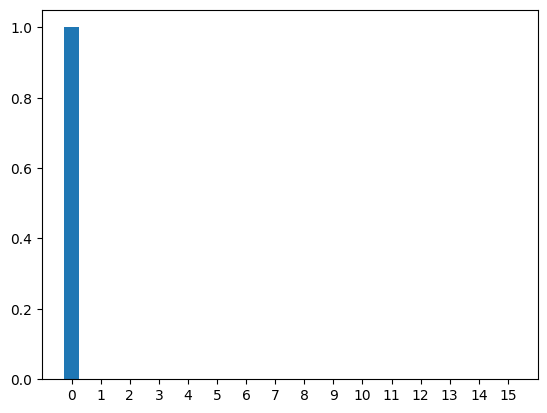



>>> Job ID: cl7qs3n75e3r3c6dt4ug
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.50007, 0: 0.49993}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.50007, 0: 0.49993}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
1
{1: 0.50007, 0: 0.49993}


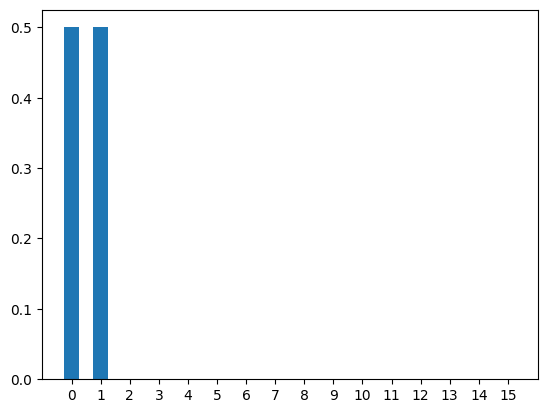



>>> Job ID: cl7qs45fa6vtjv8rud1g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.25005, 0: 0.25057, 1: 0.49938}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.25005, 0: 0.25057, 1: 0.49938}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
2
{2: 0.25005, 0: 0.25057, 1: 0.49938}


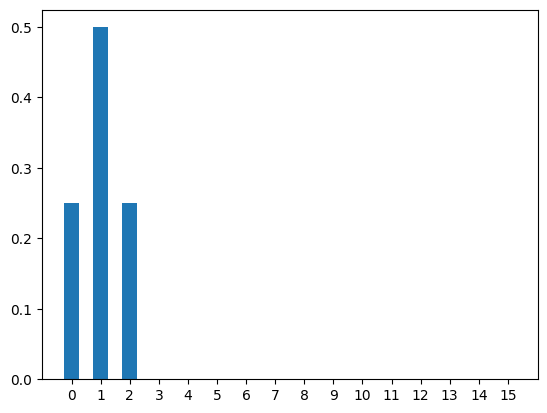



>>> Job ID: cl7qs4l7pau17fl1hsa0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.12273, 0: 0.12788, 10: 0.12464, 1: 0.62475}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.12273, 0: 0.12788, 10: 0.12464, 1: 0.62475}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
3
{2: 0.12273, 0: 0.12788, 10: 0.12464, 1: 0.62475}


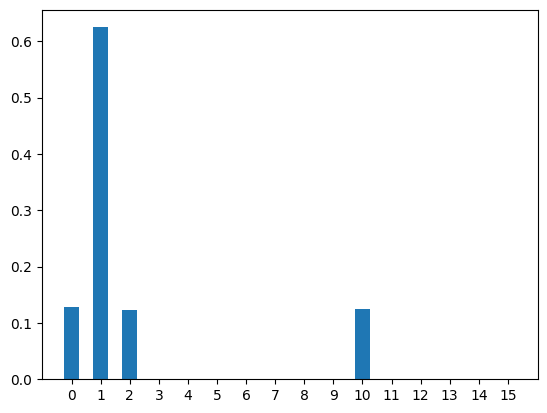



>>> Job ID: cl7qs57l4q34kqgkf150
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{11: 0.06254, 3: 0.0625, 2: 0.12291, 0: 0.06315, 1: 0.62635, 10: 0.06255}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {11: 0.06254, 3: 0.0625, 2: 0.12291, 0: 0.06315, 1: 0.62635, 10: 0.06255}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
4
{11: 0.06254, 3: 0.0625, 2: 0.12291, 0: 0.06315, 1: 0.62635, 10: 0.06255}


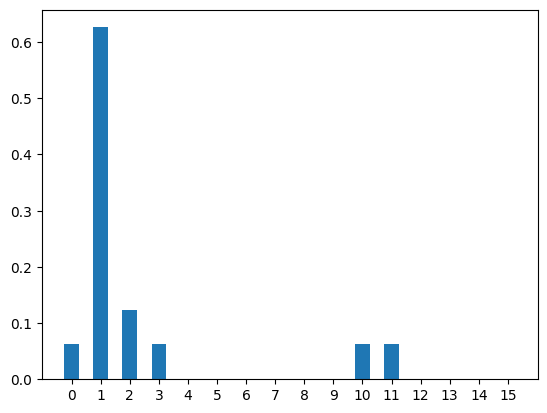



>>> Job ID: cl7qs5h6mcdhud4eg0b0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{0: 0.03161, 3: 0.03107, 1: 0.53199, 2: 0.12409, 12: 0.03096, 4: 0.03021, 11: 0.06329, 10: 0.15678}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {0: 0.03161, 3: 0.03107, 1: 0.53199, 2: 0.12409, 12: 0.03096, 4: 0.03021, 11: 0.06329, 10: 0.15678}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
5
{0: 0.03161, 3: 0.03107, 1: 0.53199, 2: 0.12409, 12: 0.03096, 4: 0.03021, 11: 0.06329, 10: 0.15678}


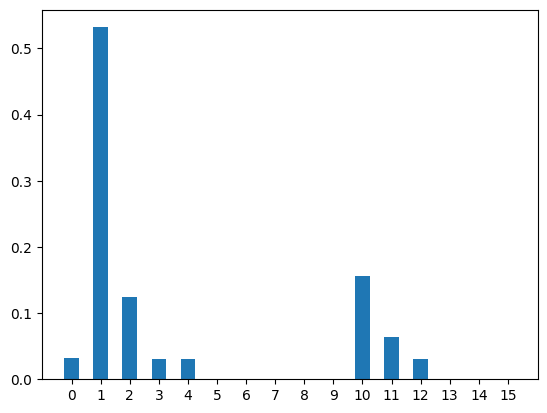



>>> Job ID: cl7qs6fl4q34kqgkf1v0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01597, 3: 0.01524, 0: 0.01642, 4: 0.03137, 11: 0.1424, 1: 0.40405, 12: 0.07865, 5: 0.01542, 2: 0.2041, 10: 0.07638}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01597, 3: 0.01524, 0: 0.01642, 4: 0.03137, 11: 0.1424, 1: 0.40405, 12: 0.07865, 5: 0.01542, 2: 0.2041, 10: 0.07638}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
6
{9: 0.01597, 3: 0.01524, 0: 0.01642, 4: 0.03137, 11: 0.1424, 1: 0.40405, 12: 0.07865, 5: 0.01542, 2: 0.2041, 10: 0.07638}


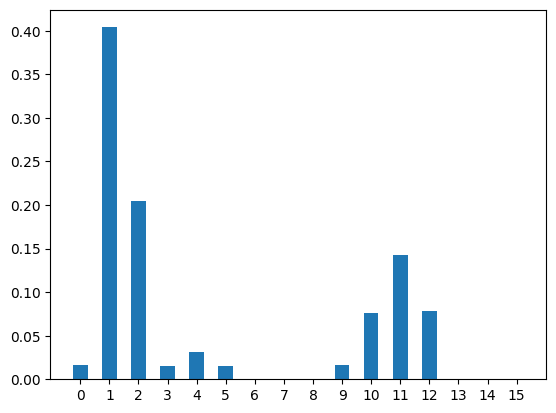



>>> Job ID: cl7qs715o5utp9bqetdg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{4: 0.00768, 6: 0.00794, 13: 0.00729, 10: 0.01607, 1: 0.29059, 12: 0.07793, 5: 0.04024, 2: 0.31893, 11: 0.07702, 9: 0.07027, 0: 0.0082, 3: 0.07784}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {4: 0.00768, 6: 0.00794, 13: 0.00729, 10: 0.01607, 1: 0.29059, 12: 0.07793, 5: 0.04024, 2: 0.31893, 11: 0.07702, 9: 0.07027, 0: 0.0082, 3: 0.07784}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
7
{4: 0.00768, 6: 0.00794, 13: 0.00729, 10: 0.01607, 1: 0.29059, 12: 0.07793, 5: 0.04024, 2: 0.31893, 11: 0.07702, 9: 0.07027, 0: 0.0082, 3: 0.07784}


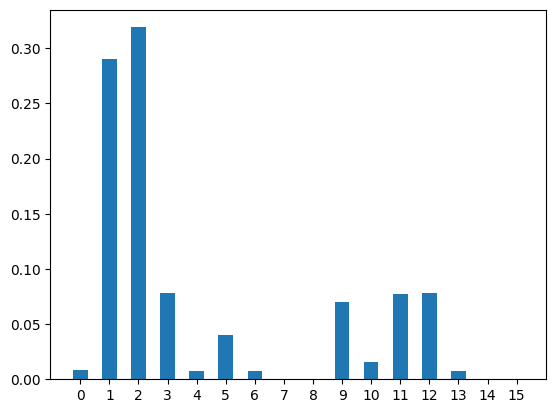



>>> Job ID: cl7qs7l7pau17fl1hu50
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00419, 10: 0.01978, 13: 0.03475, 9: 0.01957, 5: 0.00768, 12: 0.07814, 1: 0.19658, 2: 0.41334, 7: 0.00366, 0: 0.00377, 3: 0.05089, 6: 0.03948, 4: 0.06565, 11: 0.06252}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00419, 10: 0.01978, 13: 0.03475, 9: 0.01957, 5: 0.00768, 12: 0.07814, 1: 0.19658, 2: 0.41334, 7: 0.00366, 0: 0.00377, 3: 0.05089, 6: 0.03948, 4: 0.06565, 11: 0.06252}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
8
{14: 0.00419, 10: 0.01978, 13: 0.03475, 9: 0.01957, 5: 0.00768, 12: 0.07814, 1: 0.19658, 2: 0.41334, 7: 0.00366, 0: 0.00377, 3: 0.05089, 6: 0.03948, 4: 0.06565, 11: 0.06252}


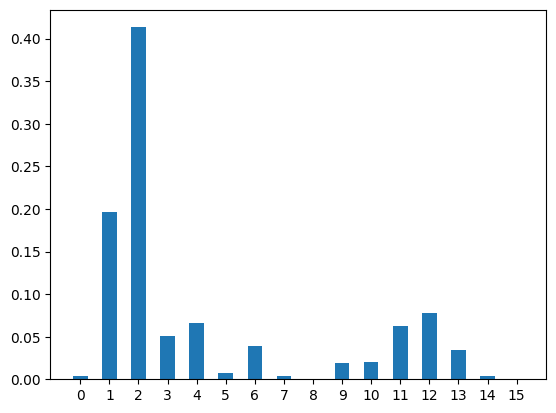



>>> Job ID: cl7qs9h6mcdhud4eg2fg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00191, 8: 0.00193, 14: 0.01954, 15: 0.00222, 10: 0.07939, 5: 0.02488, 12: 0.03959, 1: 0.12585, 11: 0.04891, 6: 0.00721, 4: 0.05144, 9: 0.08772, 2: 0.45425, 0: 0.00198, 3: 0.01938, 7: 0.0338}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00191, 8: 0.00193, 14: 0.01954, 15: 0.00222, 10: 0.07939, 5: 0.02488, 12: 0.03959, 1: 0.12585, 11: 0.04891, 6: 0.00721, 4: 0.05144, 9: 0.08772, 2: 0.45425, 0: 0.00198, 3: 0.01938, 7: 0.0338}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
9
{13: 0.00191, 8: 0.00193, 14: 0.01954, 15: 0.00222, 10: 0.07939, 5: 0.02488, 12: 0.03959, 1: 0.12585, 11: 0.04891, 6: 0.00721, 4: 0.05144, 9: 0.08772, 2: 0.45425, 0: 0.00198, 3: 0.01938, 7: 0.0338}


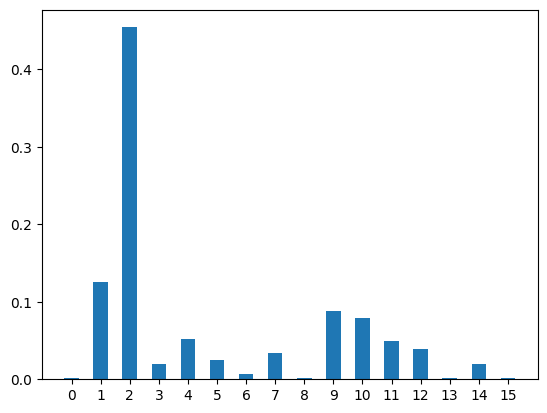



>>> Job ID: cl7qsafl4q34kqgkf430
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00475, 13: 0.00988, 8: 0.02521, 9: 0.03622, 1: 0.07893, 15: 0.0169, 10: 0.07806, 2: 0.4396, 6: 0.00481, 4: 0.019, 11: 0.08028, 0: 0.00168, 7: 0.01273, 3: 0.08018, 5: 0.06022, 12: 0.05155}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00475, 13: 0.00988, 8: 0.02521, 9: 0.03622, 1: 0.07893, 15: 0.0169, 10: 0.07806, 2: 0.4396, 6: 0.00481, 4: 0.019, 11: 0.08028, 0: 0.00168, 7: 0.01273, 3: 0.08018, 5: 0.06022, 12: 0.05155}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
10
{14: 0.00475, 13: 0.00988, 8: 0.02521, 9: 0.03622, 1: 0.07893, 15: 0.0169, 10: 0.07806, 2: 0.4396, 6: 0.00481, 4: 0.019, 11: 0.08028, 0: 0.00168, 7: 0.01273, 3: 0.08018, 5: 0.06022, 12: 0.05155}


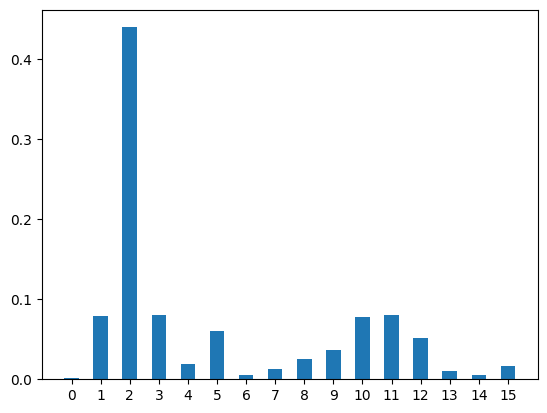



>>> Job ID: cl7qsavl4q34kqgkf4g0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.02993, 9: 0.02027, 8: 0.02052, 14: 0.00647, 11: 0.10099, 1: 0.05124, 5: 0.01893, 12: 0.08716, 2: 0.38471, 15: 0.00491, 10: 0.11279, 6: 0.06525, 4: 0.05124, 7: 0.00091, 0: 0.0122, 3: 0.03248}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.02993, 9: 0.02027, 8: 0.02052, 14: 0.00647, 11: 0.10099, 1: 0.05124, 5: 0.01893, 12: 0.08716, 2: 0.38471, 15: 0.00491, 10: 0.11279, 6: 0.06525, 4: 0.05124, 7: 0.00091, 0: 0.0122, 3: 0.03248}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
11
{13: 0.02993, 9: 0.02027, 8: 0.02052, 14: 0.00647, 11: 0.10099, 1: 0.05124, 5: 0.01893, 12: 0.08716, 2: 0.38471, 15: 0.00491, 10: 0.11279, 6: 0.06525, 4: 0.05124, 7: 0.00091, 0: 0.0122, 3: 0.03248}


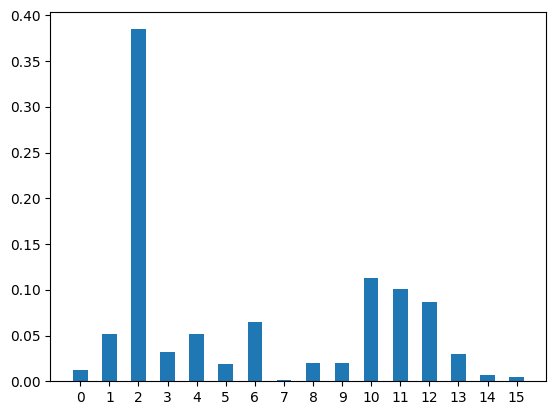



>>> Job ID: cl7qsbh5o5utp9bqevu0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00048, 8: 0.00101, 1: 0.03916, 5: 0.02778, 12: 0.09279, 11: 0.10269, 15: 0.00644, 10: 0.1187, 2: 0.31559, 13: 0.03926, 6: 0.02172, 4: 0.03772, 14: 0.03016, 0: 0.0103, 7: 0.04855, 3: 0.10765}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00048, 8: 0.00101, 1: 0.03916, 5: 0.02778, 12: 0.09279, 11: 0.10269, 15: 0.00644, 10: 0.1187, 2: 0.31559, 13: 0.03926, 6: 0.02172, 4: 0.03772, 14: 0.03016, 0: 0.0103, 7: 0.04855, 3: 0.10765}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
12
{9: 0.00048, 8: 0.00101, 1: 0.03916, 5: 0.02778, 12: 0.09279, 11: 0.10269, 15: 0.00644, 10: 0.1187, 2: 0.31559, 13: 0.03926, 6: 0.02172, 4: 0.03772, 14: 0.03016, 0: 0.0103, 7: 0.04855, 3: 0.10765}


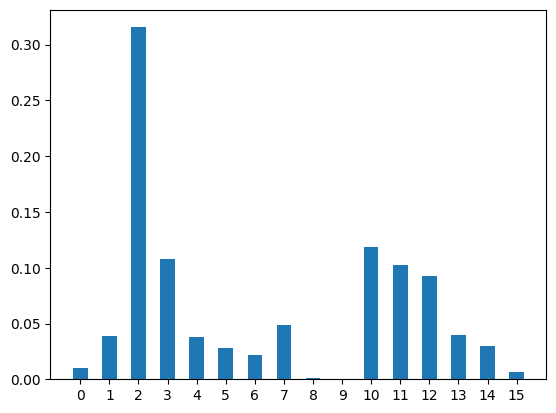



>>> Job ID: cl7qscf75e3r3c6dtah0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00012, 14: 0.01242, 9: 0.06694, 5: 0.00995, 12: 0.09056, 8: 0.02548, 0: 0.00636, 7: 0.02488, 3: 0.11115, 2: 0.26038, 11: 0.08401, 6: 0.04768, 4: 0.07508, 15: 0.01845, 10: 0.15, 1: 0.01654}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00012, 14: 0.01242, 9: 0.06694, 5: 0.00995, 12: 0.09056, 8: 0.02548, 0: 0.00636, 7: 0.02488, 3: 0.11115, 2: 0.26038, 11: 0.08401, 6: 0.04768, 4: 0.07508, 15: 0.01845, 10: 0.15, 1: 0.01654}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
13
{13: 0.00012, 14: 0.01242, 9: 0.06694, 5: 0.00995, 12: 0.09056, 8: 0.02548, 0: 0.00636, 7: 0.02488, 3: 0.11115, 2: 0.26038, 11: 0.08401, 6: 0.04768, 4: 0.07508, 15: 0.01845, 10: 0.15, 1: 0.01654}


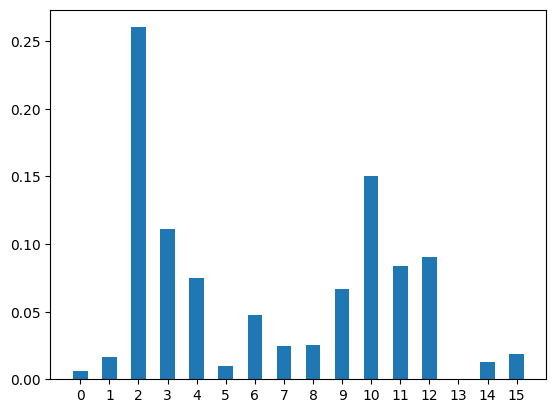



>>> Job ID: cl7qsd95o5utp9bqf13g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00639, 13: 0.00811, 8: 0.03551, 1: 0.01976, 12: 0.02187, 5: 0.07941, 9: 0.08838, 2: 0.21964, 15: 0.0202, 10: 0.10419, 6: 0.00616, 4: 0.04947, 11: 0.06838, 0: 0.00711, 7: 0.05549, 3: 0.20993}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00639, 13: 0.00811, 8: 0.03551, 1: 0.01976, 12: 0.02187, 5: 0.07941, 9: 0.08838, 2: 0.21964, 15: 0.0202, 10: 0.10419, 6: 0.00616, 4: 0.04947, 11: 0.06838, 0: 0.00711, 7: 0.05549, 3: 0.20993}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
14
{14: 0.00639, 13: 0.00811, 8: 0.03551, 1: 0.01976, 12: 0.02187, 5: 0.07941, 9: 0.08838, 2: 0.21964, 15: 0.0202, 10: 0.10419, 6: 0.00616, 4: 0.04947, 11: 0.06838, 0: 0.00711, 7: 0.05549, 3: 0.20993}


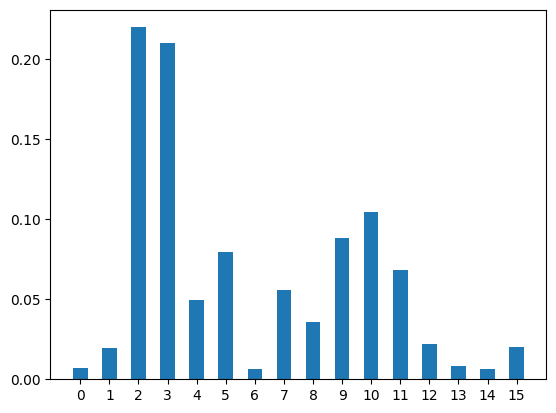



>>> Job ID: cl7qse5fa6vtjv8ruiv0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.0045, 8: 0.04633, 13: 0.0777, 1: 0.0183, 11: 0.04542, 2: 0.10373, 0: 0.02634, 7: 0.01301, 3: 0.14722, 9: 0.0258, 5: 0.07262, 12: 0.02722, 6: 0.02448, 4: 0.23923, 15: 0.00449, 10: 0.12361}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.0045, 8: 0.04633, 13: 0.0777, 1: 0.0183, 11: 0.04542, 2: 0.10373, 0: 0.02634, 7: 0.01301, 3: 0.14722, 9: 0.0258, 5: 0.07262, 12: 0.02722, 6: 0.02448, 4: 0.23923, 15: 0.00449, 10: 0.12361}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
15
{14: 0.0045, 8: 0.04633, 13: 0.0777, 1: 0.0183, 11: 0.04542, 2: 0.10373, 0: 0.02634, 7: 0.01301, 3: 0.14722, 9: 0.0258, 5: 0.07262, 12: 0.02722, 6: 0.02448, 4: 0.23923, 15: 0.00449, 10: 0.12361}


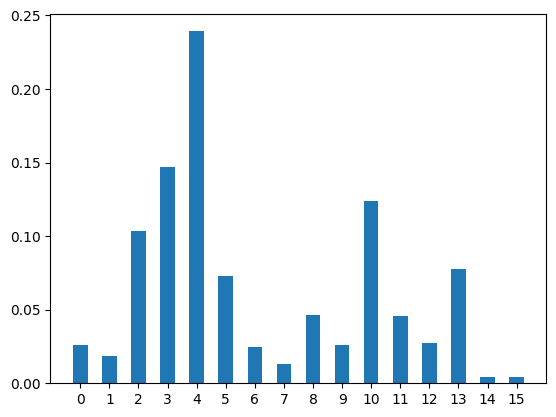



>>> Job ID: cl7qsf16mcdhud4eg5fg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00012, 7: 0.00578, 0: 0.00561, 3: 0.11482, 15: 0.00534, 10: 0.04443, 8: 0.03576, 9: 0.08288, 6: 0.02406, 4: 0.34478, 11: 0.04806, 12: 0.04917, 5: 0.10372, 1: 0.03688, 13: 0.02495, 2: 0.07364}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00012, 7: 0.00578, 0: 0.00561, 3: 0.11482, 15: 0.00534, 10: 0.04443, 8: 0.03576, 9: 0.08288, 6: 0.02406, 4: 0.34478, 11: 0.04806, 12: 0.04917, 5: 0.10372, 1: 0.03688, 13: 0.02495, 2: 0.07364}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
16
{14: 0.00012, 7: 0.00578, 0: 0.00561, 3: 0.11482, 15: 0.00534, 10: 0.04443, 8: 0.03576, 9: 0.08288, 6: 0.02406, 4: 0.34478, 11: 0.04806, 12: 0.04917, 5: 0.10372, 1: 0.03688, 13: 0.02495, 2: 0.07364}


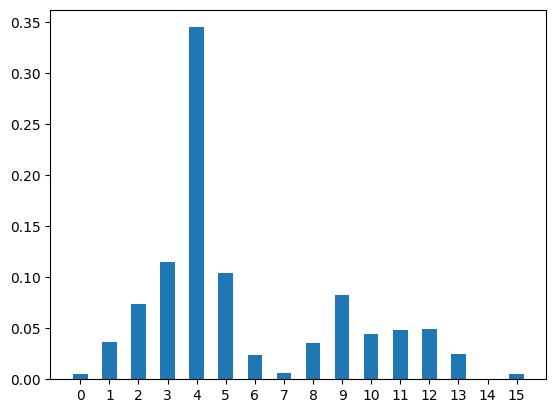



>>> Job ID: cl7qsg57pau17fl1i2ug
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00143, 15: 0.00458, 10: 0.027, 8: 0.00528, 9: 0.01964, 11: 0.05335, 13: 0.09736, 2: 0.09038, 6: 0.00354, 4: 0.447, 0: 0.00601, 7: 0.0241, 3: 0.05713, 14: 0.00576, 12: 0.05149, 5: 0.10595}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00143, 15: 0.00458, 10: 0.027, 8: 0.00528, 9: 0.01964, 11: 0.05335, 13: 0.09736, 2: 0.09038, 6: 0.00354, 4: 0.447, 0: 0.00601, 7: 0.0241, 3: 0.05713, 14: 0.00576, 12: 0.05149, 5: 0.10595}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
17
{1: 0.00143, 15: 0.00458, 10: 0.027, 8: 0.00528, 9: 0.01964, 11: 0.05335, 13: 0.09736, 2: 0.09038, 6: 0.00354, 4: 0.447, 0: 0.00601, 7: 0.0241, 3: 0.05713, 14: 0.00576, 12: 0.05149, 5: 0.10595}


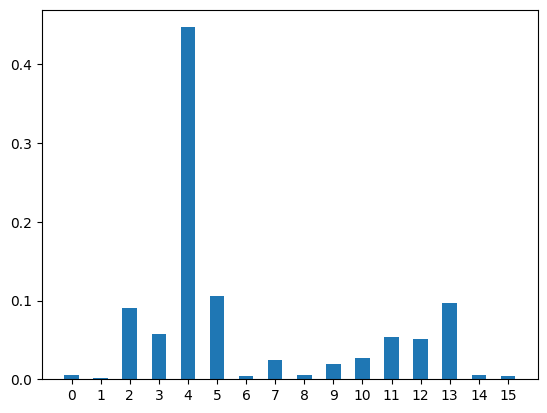



>>> Job ID: cl7qsh15o5utp9bqf3ig
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.0371, 13: 0.01575, 11: 0.04568, 1: 0.00258, 2: 0.09032, 8: 0.01898, 0: 0.00628, 7: 0.01056, 3: 0.03395, 14: 0.09705, 6: 0.0673, 4: 0.41465, 12: 0.02592, 5: 0.07001, 10: 0.05735, 15: 0.00652}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.0371, 13: 0.01575, 11: 0.04568, 1: 0.00258, 2: 0.09032, 8: 0.01898, 0: 0.00628, 7: 0.01056, 3: 0.03395, 14: 0.09705, 6: 0.0673, 4: 0.41465, 12: 0.02592, 5: 0.07001, 10: 0.05735, 15: 0.00652}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
18
{9: 0.0371, 13: 0.01575, 11: 0.04568, 1: 0.00258, 2: 0.09032, 8: 0.01898, 0: 0.00628, 7: 0.01056, 3: 0.03395, 14: 0.09705, 6: 0.0673, 4: 0.41465, 12: 0.02592, 5: 0.07001, 10: 0.05735, 15: 0.00652}


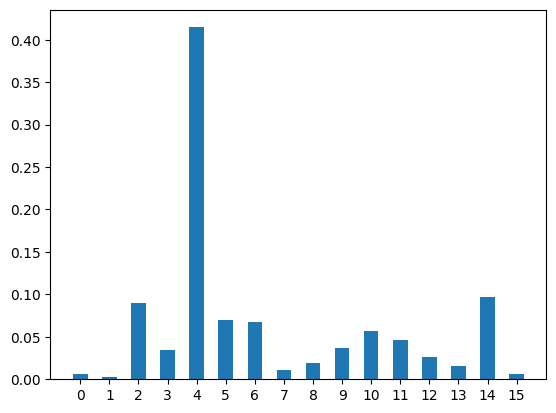



>>> Job ID: cl7qsj7l4q34kqgkf92g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00182, 8: 0.00608, 13: 0.023, 2: 0.04343, 1: 0.00619, 11: 0.04472, 7: 0.04315, 3: 0.06319, 0: 0.00661, 5: 0.18559, 12: 0.04496, 10: 0.08041, 15: 0.06463, 14: 0.0494, 4: 0.231, 6: 0.10582}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00182, 8: 0.00608, 13: 0.023, 2: 0.04343, 1: 0.00619, 11: 0.04472, 7: 0.04315, 3: 0.06319, 0: 0.00661, 5: 0.18559, 12: 0.04496, 10: 0.08041, 15: 0.06463, 14: 0.0494, 4: 0.231, 6: 0.10582}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
19
{9: 0.00182, 8: 0.00608, 13: 0.023, 2: 0.04343, 1: 0.00619, 11: 0.04472, 7: 0.04315, 3: 0.06319, 0: 0.00661, 5: 0.18559, 12: 0.04496, 10: 0.08041, 15: 0.06463, 14: 0.0494, 4: 0.231, 6: 0.10582}


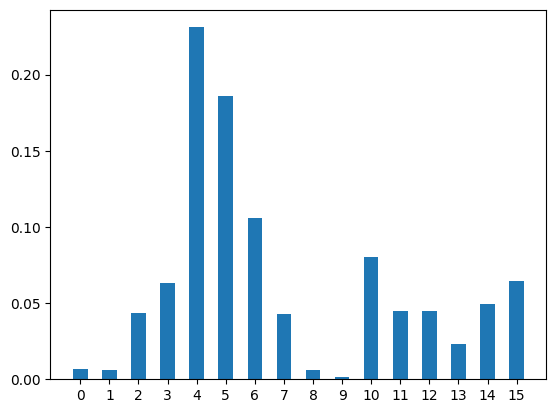



>>> Job ID: cl7qsk96mcdhud4eg87g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00019, 13: 0.0038, 8: 0.00529, 11: 0.0013, 2: 0.01643, 1: 0.00786, 10: 0.09344, 15: 0.0326, 12: 0.09121, 5: 0.18113, 4: 0.14468, 6: 0.1945, 14: 0.0713, 0: 0.03468, 3: 0.08014, 7: 0.04145}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00019, 13: 0.0038, 8: 0.00529, 11: 0.0013, 2: 0.01643, 1: 0.00786, 10: 0.09344, 15: 0.0326, 12: 0.09121, 5: 0.18113, 4: 0.14468, 6: 0.1945, 14: 0.0713, 0: 0.03468, 3: 0.08014, 7: 0.04145}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
20
{9: 0.00019, 13: 0.0038, 8: 0.00529, 11: 0.0013, 2: 0.01643, 1: 0.00786, 10: 0.09344, 15: 0.0326, 12: 0.09121, 5: 0.18113, 4: 0.14468, 6: 0.1945, 14: 0.0713, 0: 0.03468, 3: 0.08014, 7: 0.04145}


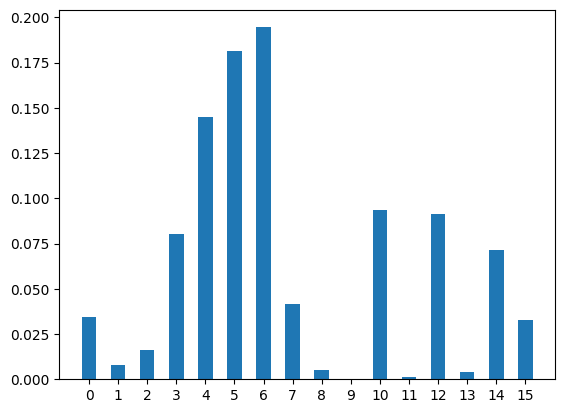



>>> Job ID: cl7qsl5fa6vtjv8rumo0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.0001, 9: 0.00188, 11: 0.00403, 2: 0.00164, 14: 0.00413, 8: 0.01536, 10: 0.06717, 15: 0.07902, 1: 0.03128, 5: 0.24361, 12: 0.08912, 0: 0.03369, 7: 0.03375, 3: 0.09065, 4: 0.10961, 6: 0.19496}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.0001, 9: 0.00188, 11: 0.00403, 2: 0.00164, 14: 0.00413, 8: 0.01536, 10: 0.06717, 15: 0.07902, 1: 0.03128, 5: 0.24361, 12: 0.08912, 0: 0.03369, 7: 0.03375, 3: 0.09065, 4: 0.10961, 6: 0.19496}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
21
{13: 0.0001, 9: 0.00188, 11: 0.00403, 2: 0.00164, 14: 0.00413, 8: 0.01536, 10: 0.06717, 15: 0.07902, 1: 0.03128, 5: 0.24361, 12: 0.08912, 0: 0.03369, 7: 0.03375, 3: 0.09065, 4: 0.10961, 6: 0.19496}


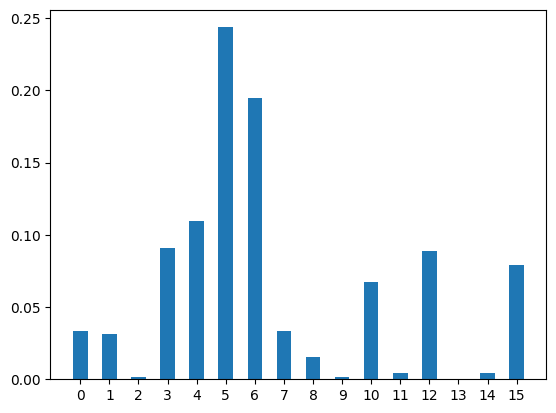



>>> Job ID: cl7qsm16mcdhud4eg9a0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.01592, 14: 0.00435, 11: 0.00589, 8: 0.0185, 1: 0.03448, 12: 0.04426, 5: 0.23398, 9: 0.04905, 6: 0.11069, 4: 0.14513, 2: 0.0304, 0: 0.06646, 3: 0.06185, 7: 0.11249, 15: 0.01298, 10: 0.05357}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.01592, 14: 0.00435, 11: 0.00589, 8: 0.0185, 1: 0.03448, 12: 0.04426, 5: 0.23398, 9: 0.04905, 6: 0.11069, 4: 0.14513, 2: 0.0304, 0: 0.06646, 3: 0.06185, 7: 0.11249, 15: 0.01298, 10: 0.05357}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
22
{13: 0.01592, 14: 0.00435, 11: 0.00589, 8: 0.0185, 1: 0.03448, 12: 0.04426, 5: 0.23398, 9: 0.04905, 6: 0.11069, 4: 0.14513, 2: 0.0304, 0: 0.06646, 3: 0.06185, 7: 0.11249, 15: 0.01298, 10: 0.05357}


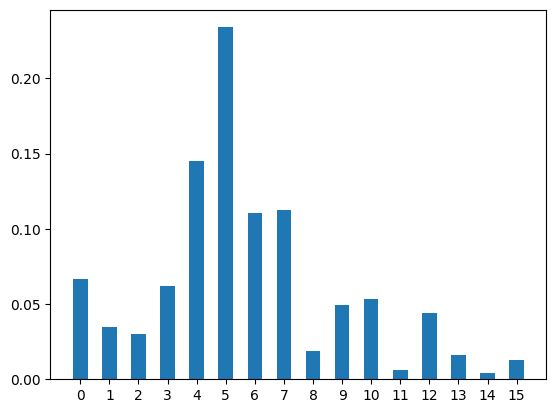



>>> Job ID: cl7qsnfl4q34kqgkfbd0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00644, 11: 0.02154, 3: 0.05924, 7: 0.11121, 0: 0.04939, 9: 0.02194, 1: 0.03271, 15: 0.00922, 10: 0.03675, 8: 0.10775, 13: 0.03008, 4: 0.17438, 6: 0.09544, 2: 0.04437, 5: 0.16283, 12: 0.03671}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00644, 11: 0.02154, 3: 0.05924, 7: 0.11121, 0: 0.04939, 9: 0.02194, 1: 0.03271, 15: 0.00922, 10: 0.03675, 8: 0.10775, 13: 0.03008, 4: 0.17438, 6: 0.09544, 2: 0.04437, 5: 0.16283, 12: 0.03671}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
23
{14: 0.00644, 11: 0.02154, 3: 0.05924, 7: 0.11121, 0: 0.04939, 9: 0.02194, 1: 0.03271, 15: 0.00922, 10: 0.03675, 8: 0.10775, 13: 0.03008, 4: 0.17438, 6: 0.09544, 2: 0.04437, 5: 0.16283, 12: 0.03671}


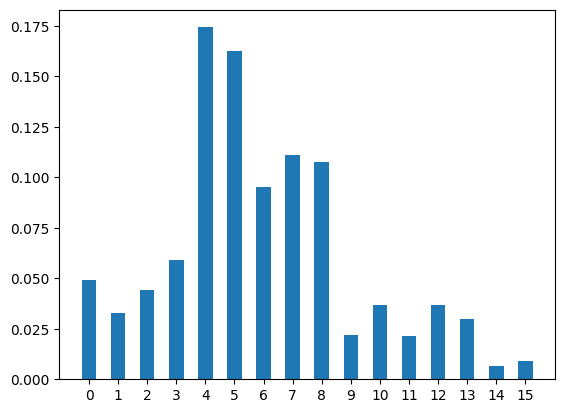



>>> Job ID: cl7qsofl4q34kqgkfbsg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00214, 14: 0.00807, 1: 0.07109, 13: 0.04111, 11: 0.05467, 4: 0.15983, 6: 0.06053, 8: 0.10045, 12: 0.02925, 5: 0.1304, 15: 0.00847, 10: 0.10354, 3: 0.00085, 0: 0.00817, 7: 0.18458, 9: 0.03685}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00214, 14: 0.00807, 1: 0.07109, 13: 0.04111, 11: 0.05467, 4: 0.15983, 6: 0.06053, 8: 0.10045, 12: 0.02925, 5: 0.1304, 15: 0.00847, 10: 0.10354, 3: 0.00085, 0: 0.00817, 7: 0.18458, 9: 0.03685}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
24
{2: 0.00214, 14: 0.00807, 1: 0.07109, 13: 0.04111, 11: 0.05467, 4: 0.15983, 6: 0.06053, 8: 0.10045, 12: 0.02925, 5: 0.1304, 15: 0.00847, 10: 0.10354, 3: 0.00085, 0: 0.00817, 7: 0.18458, 9: 0.03685}


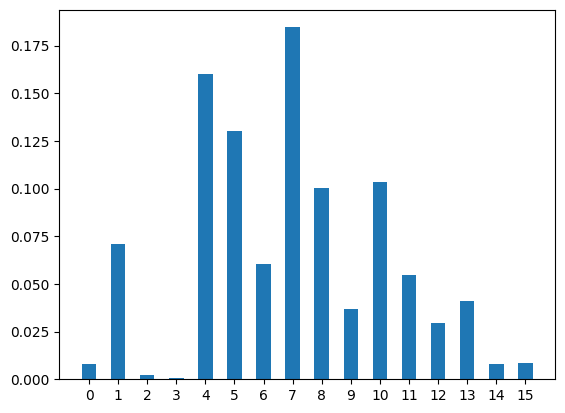



>>> Job ID: cl7qspnl4q34kqgkfclg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.0003, 1: 0.00629, 10: 0.00051, 15: 0.0115, 8: 0.08552, 9: 0.04761, 13: 0.05131, 2: 0.07345, 6: 0.076, 4: 0.08599, 11: 0.05362, 0: 0.00845, 3: 0.10447, 7: 0.19048, 12: 0.02312, 5: 0.18138}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.0003, 1: 0.00629, 10: 0.00051, 15: 0.0115, 8: 0.08552, 9: 0.04761, 13: 0.05131, 2: 0.07345, 6: 0.076, 4: 0.08599, 11: 0.05362, 0: 0.00845, 3: 0.10447, 7: 0.19048, 12: 0.02312, 5: 0.18138}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
25
{14: 0.0003, 1: 0.00629, 10: 0.00051, 15: 0.0115, 8: 0.08552, 9: 0.04761, 13: 0.05131, 2: 0.07345, 6: 0.076, 4: 0.08599, 11: 0.05362, 0: 0.00845, 3: 0.10447, 7: 0.19048, 12: 0.02312, 5: 0.18138}


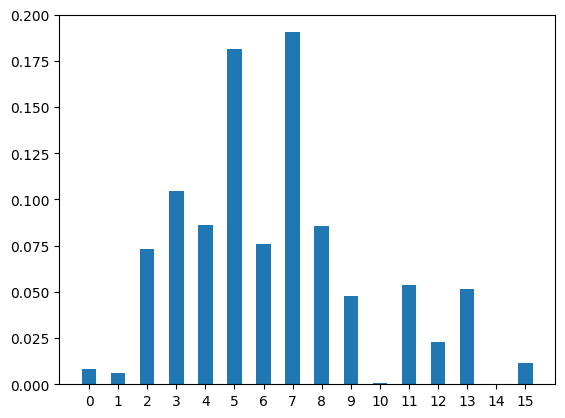



>>> Job ID: cl7qsqvl4q34kqgkfdrg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00891, 8: 0.09806, 11: 0.03331, 15: 0.01054, 10: 0.08736, 1: 0.01233, 13: 0.09014, 0: 0.00113, 3: 0.00799, 7: 0.13454, 2: 0.02565, 14: 0.04902, 6: 0.07342, 4: 0.11904, 12: 0.03755, 5: 0.21101}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00891, 8: 0.09806, 11: 0.03331, 15: 0.01054, 10: 0.08736, 1: 0.01233, 13: 0.09014, 0: 0.00113, 3: 0.00799, 7: 0.13454, 2: 0.02565, 14: 0.04902, 6: 0.07342, 4: 0.11904, 12: 0.03755, 5: 0.21101}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
26
{9: 0.00891, 8: 0.09806, 11: 0.03331, 15: 0.01054, 10: 0.08736, 1: 0.01233, 13: 0.09014, 0: 0.00113, 3: 0.00799, 7: 0.13454, 2: 0.02565, 14: 0.04902, 6: 0.07342, 4: 0.11904, 12: 0.03755, 5: 0.21101}


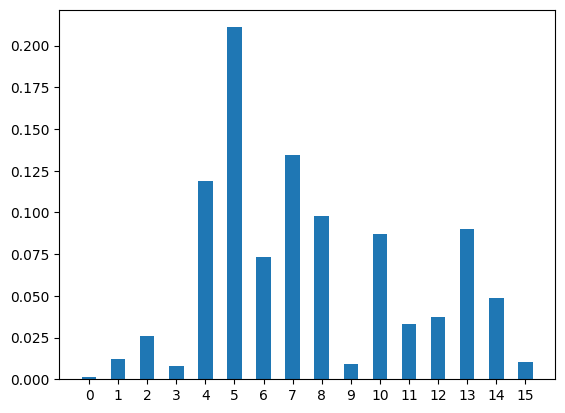



>>> Job ID: cl7qsrv75e3r3c6dtjk0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.08757, 9: 0.03708, 1: 0.01351, 14: 0.10889, 10: 0.00883, 15: 0.03274, 6: 0.07453, 4: 0.12299, 11: 0.10308, 12: 0.01695, 5: 0.18974, 3: 0.0011, 0: 0.00357, 7: 0.0722, 2: 0.0201, 13: 0.10712}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.08757, 9: 0.03708, 1: 0.01351, 14: 0.10889, 10: 0.00883, 15: 0.03274, 6: 0.07453, 4: 0.12299, 11: 0.10308, 12: 0.01695, 5: 0.18974, 3: 0.0011, 0: 0.00357, 7: 0.0722, 2: 0.0201, 13: 0.10712}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
27
{8: 0.08757, 9: 0.03708, 1: 0.01351, 14: 0.10889, 10: 0.00883, 15: 0.03274, 6: 0.07453, 4: 0.12299, 11: 0.10308, 12: 0.01695, 5: 0.18974, 3: 0.0011, 0: 0.00357, 7: 0.0722, 2: 0.0201, 13: 0.10712}


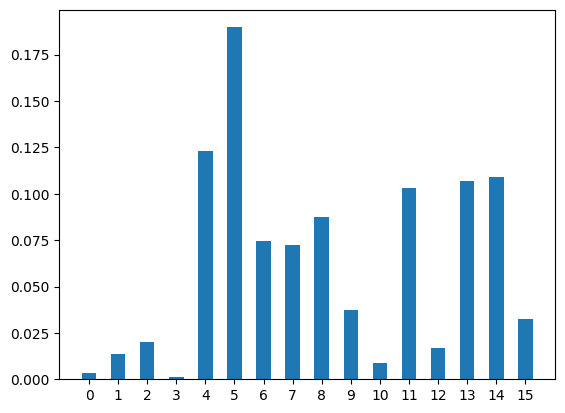



>>> Job ID: cl7qst16mcdhud4egehg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00475, 7: 0.00294, 0: 0.00524, 3: 0.02256, 2: 0.02177, 9: 0.03119, 13: 0.05126, 15: 0.04195, 10: 0.0076, 8: 0.12513, 11: 0.0978, 14: 0.18073, 4: 0.0897, 6: 0.17532, 5: 0.11991, 12: 0.02215}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00475, 7: 0.00294, 0: 0.00524, 3: 0.02256, 2: 0.02177, 9: 0.03119, 13: 0.05126, 15: 0.04195, 10: 0.0076, 8: 0.12513, 11: 0.0978, 14: 0.18073, 4: 0.0897, 6: 0.17532, 5: 0.11991, 12: 0.02215}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
28
{1: 0.00475, 7: 0.00294, 0: 0.00524, 3: 0.02256, 2: 0.02177, 9: 0.03119, 13: 0.05126, 15: 0.04195, 10: 0.0076, 8: 0.12513, 11: 0.0978, 14: 0.18073, 4: 0.0897, 6: 0.17532, 5: 0.11991, 12: 0.02215}


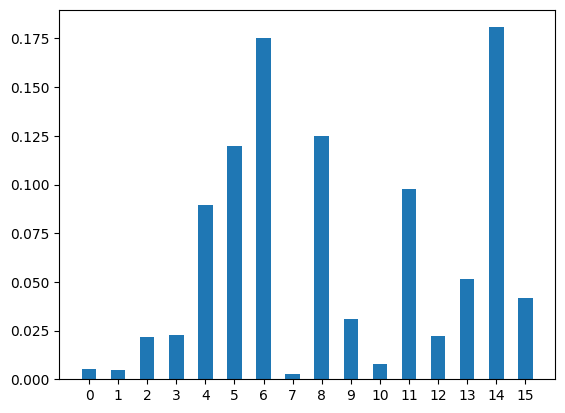



>>> Job ID: cl7qsufl4q34kqgkfgq0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 5e-05, 13: 0.00347, 11: 0.02405, 12: 0.077, 5: 0.1693, 1: 0.00985, 4: 0.04143, 6: 0.18016, 0: 0.0026, 7: 0.00149, 3: 0.03251, 14: 0.2281, 10: 0.03744, 15: 0.03923, 8: 0.12842, 9: 0.0249}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 5e-05, 13: 0.00347, 11: 0.02405, 12: 0.077, 5: 0.1693, 1: 0.00985, 4: 0.04143, 6: 0.18016, 0: 0.0026, 7: 0.00149, 3: 0.03251, 14: 0.2281, 10: 0.03744, 15: 0.03923, 8: 0.12842, 9: 0.0249}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
29
{2: 5e-05, 13: 0.00347, 11: 0.02405, 12: 0.077, 5: 0.1693, 1: 0.00985, 4: 0.04143, 6: 0.18016, 0: 0.0026, 7: 0.00149, 3: 0.03251, 14: 0.2281, 10: 0.03744, 15: 0.03923, 8: 0.12842, 9: 0.0249}


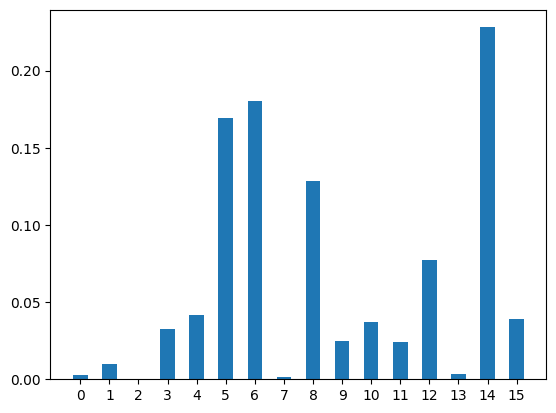



>>> Job ID: cl7qsv96mcdhud4egfv0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00179, 2: 0.01006, 9: 0.04419, 11: 0.00405, 0: 0.02505, 3: 0.04361, 7: 0.06097, 14: 0.21036, 12: 0.05615, 5: 0.19886, 8: 0.0827, 13: 0.0624, 4: 0.01052, 6: 0.12534, 10: 0.02814, 15: 0.03581}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00179, 2: 0.01006, 9: 0.04419, 11: 0.00405, 0: 0.02505, 3: 0.04361, 7: 0.06097, 14: 0.21036, 12: 0.05615, 5: 0.19886, 8: 0.0827, 13: 0.0624, 4: 0.01052, 6: 0.12534, 10: 0.02814, 15: 0.03581}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
30
{1: 0.00179, 2: 0.01006, 9: 0.04419, 11: 0.00405, 0: 0.02505, 3: 0.04361, 7: 0.06097, 14: 0.21036, 12: 0.05615, 5: 0.19886, 8: 0.0827, 13: 0.0624, 4: 0.01052, 6: 0.12534, 10: 0.02814, 15: 0.03581}


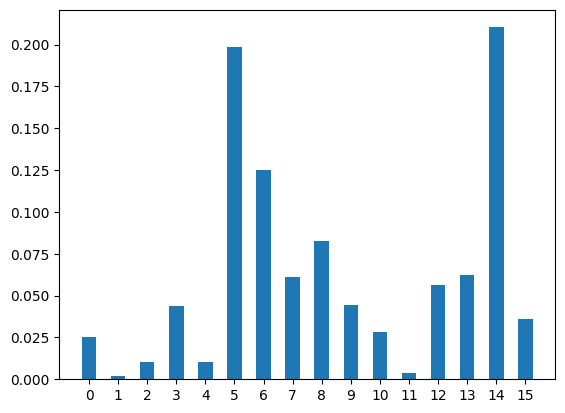



>>> Job ID: cl7qt0v75e3r3c6dtn2g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00374, 1: 0.00881, 2: 0.00594, 13: 0.05908, 11: 0.01302, 10: 0.01144, 15: 0.1135, 8: 0.0711, 12: 0.05825, 5: 0.18792, 4: 0.0365, 6: 0.11397, 14: 0.15477, 0: 0.05234, 3: 0.0475, 7: 0.06212}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00374, 1: 0.00881, 2: 0.00594, 13: 0.05908, 11: 0.01302, 10: 0.01144, 15: 0.1135, 8: 0.0711, 12: 0.05825, 5: 0.18792, 4: 0.0365, 6: 0.11397, 14: 0.15477, 0: 0.05234, 3: 0.0475, 7: 0.06212}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
31
{9: 0.00374, 1: 0.00881, 2: 0.00594, 13: 0.05908, 11: 0.01302, 10: 0.01144, 15: 0.1135, 8: 0.0711, 12: 0.05825, 5: 0.18792, 4: 0.0365, 6: 0.11397, 14: 0.15477, 0: 0.05234, 3: 0.0475, 7: 0.06212}


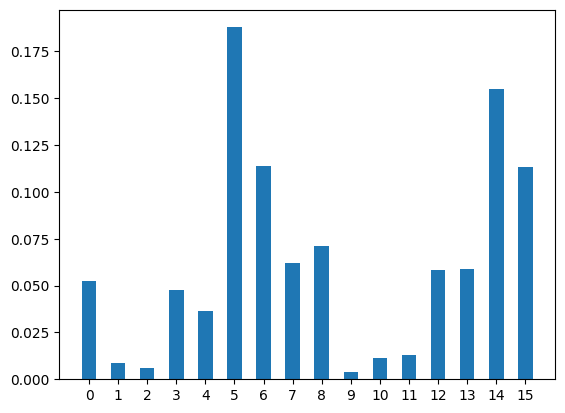



>>> Job ID: cl7qt2dfa6vtjv8rv00g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.00035, 14: 0.00869, 2: 0.00298, 1: 0.00882, 3: 0.01446, 7: 0.07234, 0: 0.10497, 10: 0.05065, 15: 0.21738, 8: 0.07008, 11: 0.01017, 4: 0.01934, 6: 0.1503, 5: 0.15384, 12: 0.0457, 9: 0.06993}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.00035, 14: 0.00869, 2: 0.00298, 1: 0.00882, 3: 0.01446, 7: 0.07234, 0: 0.10497, 10: 0.05065, 15: 0.21738, 8: 0.07008, 11: 0.01017, 4: 0.01934, 6: 0.1503, 5: 0.15384, 12: 0.0457, 9: 0.06993}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
32
{13: 0.00035, 14: 0.00869, 2: 0.00298, 1: 0.00882, 3: 0.01446, 7: 0.07234, 0: 0.10497, 10: 0.05065, 15: 0.21738, 8: 0.07008, 11: 0.01017, 4: 0.01934, 6: 0.1503, 5: 0.15384, 12: 0.0457, 9: 0.06993}


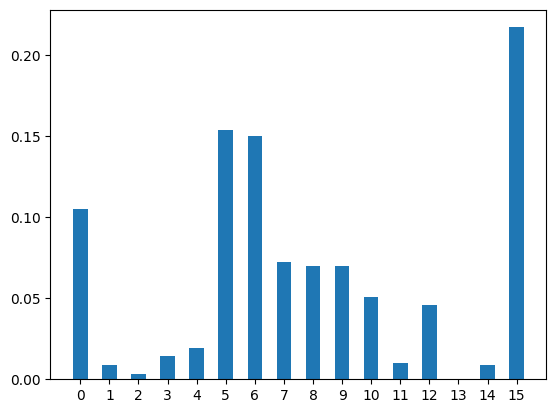



>>> Job ID: cl7qt3h6mcdhud4egidg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00096, 2: 0.001, 9: 0.0355, 1: 0.00755, 13: 0.03449, 11: 0.0481, 10: 0.00353, 15: 0.21181, 4: 0.01737, 6: 0.27458, 8: 0.05345, 12: 0.01532, 5: 0.04383, 3: 0.07356, 0: 0.11271, 7: 0.06624}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00096, 2: 0.001, 9: 0.0355, 1: 0.00755, 13: 0.03449, 11: 0.0481, 10: 0.00353, 15: 0.21181, 4: 0.01737, 6: 0.27458, 8: 0.05345, 12: 0.01532, 5: 0.04383, 3: 0.07356, 0: 0.11271, 7: 0.06624}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
33
{14: 0.00096, 2: 0.001, 9: 0.0355, 1: 0.00755, 13: 0.03449, 11: 0.0481, 10: 0.00353, 15: 0.21181, 4: 0.01737, 6: 0.27458, 8: 0.05345, 12: 0.01532, 5: 0.04383, 3: 0.07356, 0: 0.11271, 7: 0.06624}


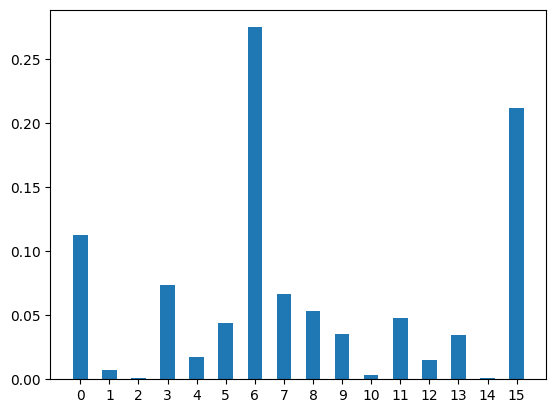



>>> Job ID: cl7qt55fa6vtjv8rv1k0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{2: 0.00415, 14: 0.00446, 8: 0.02262, 9: 0.03039, 11: 0.0421, 5: 0.0442, 12: 0.02223, 13: 0.06313, 3: 0.02019, 7: 0.05004, 0: 0.15442, 1: 0.02785, 15: 0.14828, 10: 0.01169, 6: 0.27672, 4: 0.07753}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {2: 0.00415, 14: 0.00446, 8: 0.02262, 9: 0.03039, 11: 0.0421, 5: 0.0442, 12: 0.02223, 13: 0.06313, 3: 0.02019, 7: 0.05004, 0: 0.15442, 1: 0.02785, 15: 0.14828, 10: 0.01169, 6: 0.27672, 4: 0.07753}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
34
{2: 0.00415, 14: 0.00446, 8: 0.02262, 9: 0.03039, 11: 0.0421, 5: 0.0442, 12: 0.02223, 13: 0.06313, 3: 0.02019, 7: 0.05004, 0: 0.15442, 1: 0.02785, 15: 0.14828, 10: 0.01169, 6: 0.27672, 4: 0.07753}


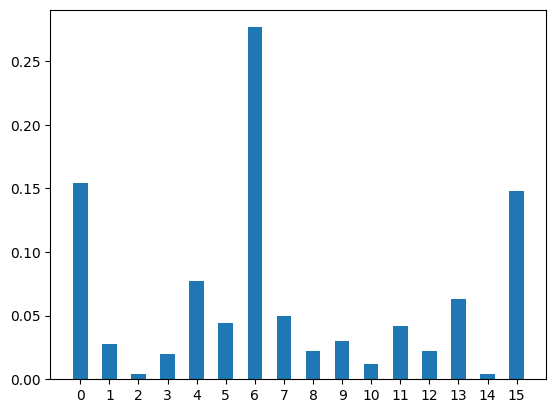



>>> Job ID: cl7qt6h6mcdhud4egjs0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{8: 0.02235, 12: 0.0101, 5: 0.02264, 9: 0.0274, 2: 0.02707, 4: 0.07885, 6: 0.181, 1: 0.15819, 13: 0.032, 10: 0.01211, 15: 0.06325, 3: 0.02346, 0: 0.08725, 7: 0.15156, 14: 0.06025, 11: 0.04252}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {8: 0.02235, 12: 0.0101, 5: 0.02264, 9: 0.0274, 2: 0.02707, 4: 0.07885, 6: 0.181, 1: 0.15819, 13: 0.032, 10: 0.01211, 15: 0.06325, 3: 0.02346, 0: 0.08725, 7: 0.15156, 14: 0.06025, 11: 0.04252}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
35
{8: 0.02235, 12: 0.0101, 5: 0.02264, 9: 0.0274, 2: 0.02707, 4: 0.07885, 6: 0.181, 1: 0.15819, 13: 0.032, 10: 0.01211, 15: 0.06325, 3: 0.02346, 0: 0.08725, 7: 0.15156, 14: 0.06025, 11: 0.04252}


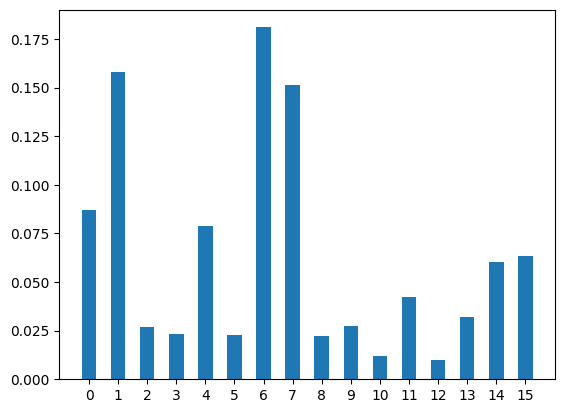



>>> Job ID: cl7qt7tfa6vtjv8rv32g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{10: 0.02462, 15: 0.06106, 14: 0.04418, 13: 0.00883, 9: 0.03465, 11: 0.01344, 3: 0.02653, 0: 0.05766, 7: 0.15842, 8: 0.03328, 1: 0.15411, 5: 0.01651, 12: 0.04494, 2: 0.07474, 6: 0.17878, 4: 0.06825}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {10: 0.02462, 15: 0.06106, 14: 0.04418, 13: 0.00883, 9: 0.03465, 11: 0.01344, 3: 0.02653, 0: 0.05766, 7: 0.15842, 8: 0.03328, 1: 0.15411, 5: 0.01651, 12: 0.04494, 2: 0.07474, 6: 0.17878, 4: 0.06825}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
36
{10: 0.02462, 15: 0.06106, 14: 0.04418, 13: 0.00883, 9: 0.03465, 11: 0.01344, 3: 0.02653, 0: 0.05766, 7: 0.15842, 8: 0.03328, 1: 0.15411, 5: 0.01651, 12: 0.04494, 2: 0.07474, 6: 0.17878, 4: 0.06825}


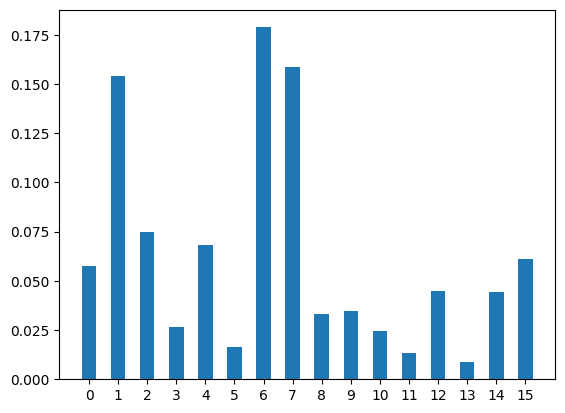



>>> Job ID: cl7qt995o5utp9bqfic0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.00577, 8: 0.02276, 13: 0.05826, 15: 0.07383, 10: 0.02448, 14: 0.03742, 11: 0.02275, 4: 0.05508, 6: 0.15411, 2: 0.07637, 1: 0.15389, 5: 0.02953, 12: 0.05246, 3: 0.0091, 0: 0.05647, 7: 0.16772}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.00577, 8: 0.02276, 13: 0.05826, 15: 0.07383, 10: 0.02448, 14: 0.03742, 11: 0.02275, 4: 0.05508, 6: 0.15411, 2: 0.07637, 1: 0.15389, 5: 0.02953, 12: 0.05246, 3: 0.0091, 0: 0.05647, 7: 0.16772}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
37
{9: 0.00577, 8: 0.02276, 13: 0.05826, 15: 0.07383, 10: 0.02448, 14: 0.03742, 11: 0.02275, 4: 0.05508, 6: 0.15411, 2: 0.07637, 1: 0.15389, 5: 0.02953, 12: 0.05246, 3: 0.0091, 0: 0.05647, 7: 0.16772}


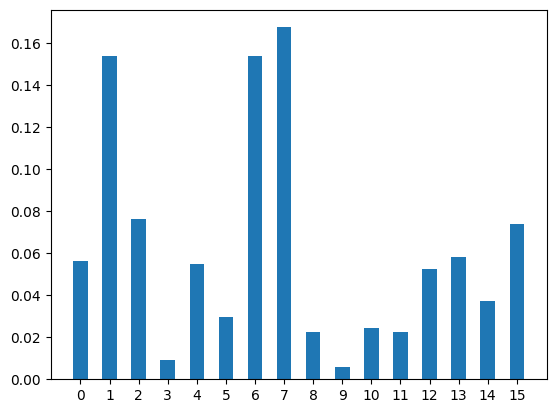



>>> Job ID: cl7qtalfa6vtjv8rv4hg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{15: 0.00885, 10: 0.06482, 8: 0.03047, 9: 0.00363, 2: 0.1066, 11: 0.03614, 5: 0.04066, 12: 0.05807, 6: 0.04929, 4: 0.04298, 14: 0.09387, 3: 0.00577, 7: 0.25502, 0: 0.10691, 13: 0.01524, 1: 0.08168}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {15: 0.00885, 10: 0.06482, 8: 0.03047, 9: 0.00363, 2: 0.1066, 11: 0.03614, 5: 0.04066, 12: 0.05807, 6: 0.04929, 4: 0.04298, 14: 0.09387, 3: 0.00577, 7: 0.25502, 0: 0.10691, 13: 0.01524, 1: 0.08168}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
38
{15: 0.00885, 10: 0.06482, 8: 0.03047, 9: 0.00363, 2: 0.1066, 11: 0.03614, 5: 0.04066, 12: 0.05807, 6: 0.04929, 4: 0.04298, 14: 0.09387, 3: 0.00577, 7: 0.25502, 0: 0.10691, 13: 0.01524, 1: 0.08168}


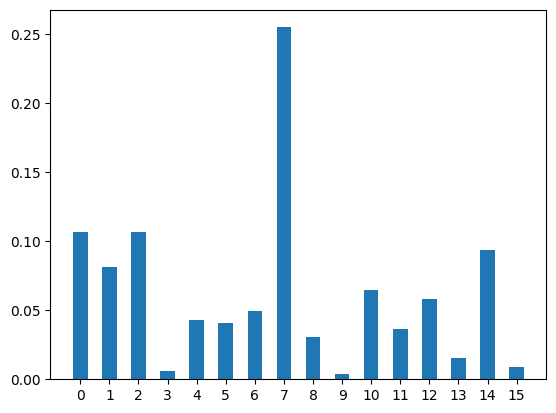



>>> Job ID: cl7qtc7l4q34kqgkfokg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00243, 13: 0.00327, 9: 0.02339, 8: 0.03136, 1: 0.00939, 11: 0.04721, 10: 0.09686, 15: 0.09334, 2: 0.08585, 4: 0.03327, 6: 0.02245, 3: 0.05575, 0: 0.11339, 7: 0.27999, 5: 0.05342, 12: 0.04863}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00243, 13: 0.00327, 9: 0.02339, 8: 0.03136, 1: 0.00939, 11: 0.04721, 10: 0.09686, 15: 0.09334, 2: 0.08585, 4: 0.03327, 6: 0.02245, 3: 0.05575, 0: 0.11339, 7: 0.27999, 5: 0.05342, 12: 0.04863}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
39
{14: 0.00243, 13: 0.00327, 9: 0.02339, 8: 0.03136, 1: 0.00939, 11: 0.04721, 10: 0.09686, 15: 0.09334, 2: 0.08585, 4: 0.03327, 6: 0.02245, 3: 0.05575, 0: 0.11339, 7: 0.27999, 5: 0.05342, 12: 0.04863}


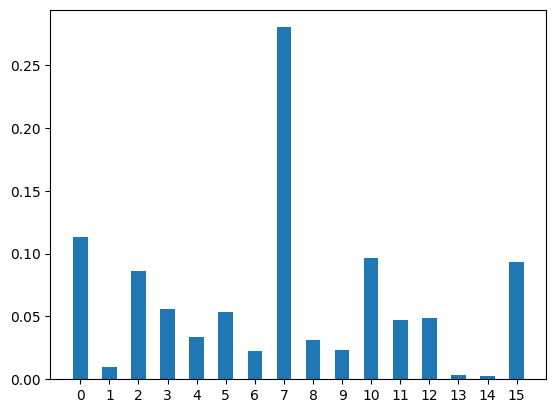



>>> Job ID: cl7qtdvl4q34kqgkfpgg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.00302, 13: 0.00859, 9: 0.02139, 1: 0.03523, 8: 0.07839, 2: 0.07324, 11: 0.04918, 15: 0.04311, 10: 0.05012, 0: 0.14024, 7: 0.22945, 3: 0.0737, 12: 0.06943, 5: 0.08064, 4: 0.02446, 6: 0.01981}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.00302, 13: 0.00859, 9: 0.02139, 1: 0.03523, 8: 0.07839, 2: 0.07324, 11: 0.04918, 15: 0.04311, 10: 0.05012, 0: 0.14024, 7: 0.22945, 3: 0.0737, 12: 0.06943, 5: 0.08064, 4: 0.02446, 6: 0.01981}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
40
{14: 0.00302, 13: 0.00859, 9: 0.02139, 1: 0.03523, 8: 0.07839, 2: 0.07324, 11: 0.04918, 15: 0.04311, 10: 0.05012, 0: 0.14024, 7: 0.22945, 3: 0.0737, 12: 0.06943, 5: 0.08064, 4: 0.02446, 6: 0.01981}


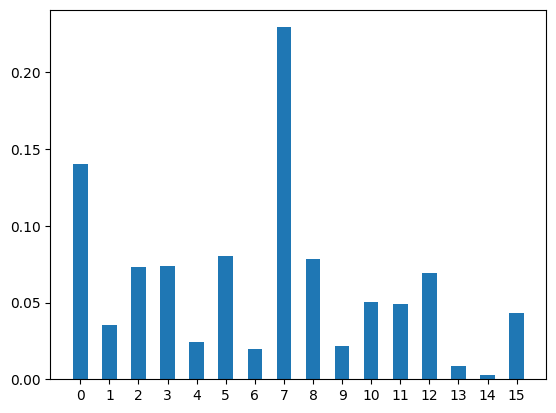



>>> Job ID: cl7qtfd7pau17fl1ilog
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00518, 14: 0.00664, 13: 0.01703, 2: 0.07924, 11: 0.01415, 9: 0.0708, 15: 0.0127, 10: 0.09879, 3: 0.05476, 7: 0.15315, 0: 0.16713, 4: 0.00586, 6: 0.0184, 8: 0.1575, 12: 0.03854, 5: 0.10013}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00518, 14: 0.00664, 13: 0.01703, 2: 0.07924, 11: 0.01415, 9: 0.0708, 15: 0.0127, 10: 0.09879, 3: 0.05476, 7: 0.15315, 0: 0.16713, 4: 0.00586, 6: 0.0184, 8: 0.1575, 12: 0.03854, 5: 0.10013}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
41
{1: 0.00518, 14: 0.00664, 13: 0.01703, 2: 0.07924, 11: 0.01415, 9: 0.0708, 15: 0.0127, 10: 0.09879, 3: 0.05476, 7: 0.15315, 0: 0.16713, 4: 0.00586, 6: 0.0184, 8: 0.1575, 12: 0.03854, 5: 0.10013}


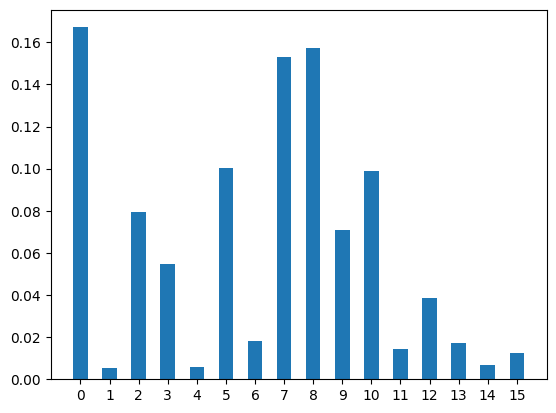



>>> Job ID: cl7qth5fa6vtjv8rv7bg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01515, 14: 0.01674, 2: 0.07804, 4: 0.01438, 6: 0.02376, 8: 0.20893, 11: 0.0948, 5: 0.09146, 12: 0.03753, 1: 0.15602, 13: 0.0486, 0: 0.03037, 7: 0.10171, 3: 0.02741, 10: 0.04702, 15: 0.00808}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01515, 14: 0.01674, 2: 0.07804, 4: 0.01438, 6: 0.02376, 8: 0.20893, 11: 0.0948, 5: 0.09146, 12: 0.03753, 1: 0.15602, 13: 0.0486, 0: 0.03037, 7: 0.10171, 3: 0.02741, 10: 0.04702, 15: 0.00808}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
42
{9: 0.01515, 14: 0.01674, 2: 0.07804, 4: 0.01438, 6: 0.02376, 8: 0.20893, 11: 0.0948, 5: 0.09146, 12: 0.03753, 1: 0.15602, 13: 0.0486, 0: 0.03037, 7: 0.10171, 3: 0.02741, 10: 0.04702, 15: 0.00808}


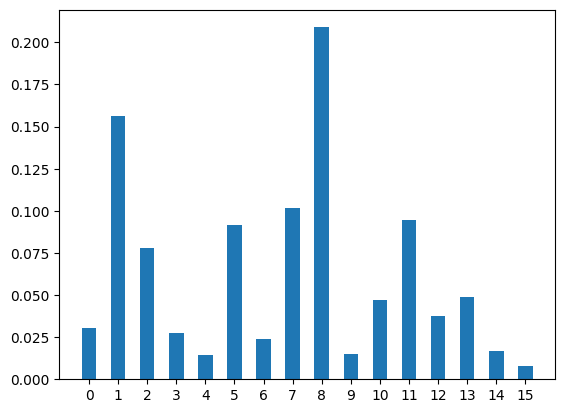



>>> Job ID: cl7qtilfa6vtjv8rv8a0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{13: 0.02633, 15: 0.01958, 10: 0.06424, 9: 0.0582, 14: 0.03119, 5: 0.04471, 12: 0.06023, 4: 0.01696, 6: 0.07107, 2: 0.08891, 8: 0.22978, 1: 0.13514, 0: 0.00113, 7: 0.07046, 3: 0.02006, 11: 0.06201}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {13: 0.02633, 15: 0.01958, 10: 0.06424, 9: 0.0582, 14: 0.03119, 5: 0.04471, 12: 0.06023, 4: 0.01696, 6: 0.07107, 2: 0.08891, 8: 0.22978, 1: 0.13514, 0: 0.00113, 7: 0.07046, 3: 0.02006, 11: 0.06201}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
43
{13: 0.02633, 15: 0.01958, 10: 0.06424, 9: 0.0582, 14: 0.03119, 5: 0.04471, 12: 0.06023, 4: 0.01696, 6: 0.07107, 2: 0.08891, 8: 0.22978, 1: 0.13514, 0: 0.00113, 7: 0.07046, 3: 0.02006, 11: 0.06201}


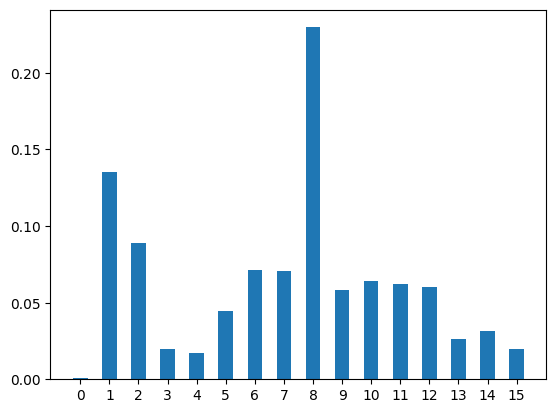



>>> Job ID: cl7qtkn75e3r3c6du1v0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{15: 0.00524, 10: 0.01854, 4: 0.00511, 6: 0.08746, 9: 0.06504, 0: 0.02045, 7: 0.0412, 3: 0.05817, 13: 0.03692, 2: 0.09913, 8: 0.2238, 1: 0.12379, 14: 0.02621, 5: 0.0405, 12: 0.02239, 11: 0.12605}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {15: 0.00524, 10: 0.01854, 4: 0.00511, 6: 0.08746, 9: 0.06504, 0: 0.02045, 7: 0.0412, 3: 0.05817, 13: 0.03692, 2: 0.09913, 8: 0.2238, 1: 0.12379, 14: 0.02621, 5: 0.0405, 12: 0.02239, 11: 0.12605}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
44
{15: 0.00524, 10: 0.01854, 4: 0.00511, 6: 0.08746, 9: 0.06504, 0: 0.02045, 7: 0.0412, 3: 0.05817, 13: 0.03692, 2: 0.09913, 8: 0.2238, 1: 0.12379, 14: 0.02621, 5: 0.0405, 12: 0.02239, 11: 0.12605}


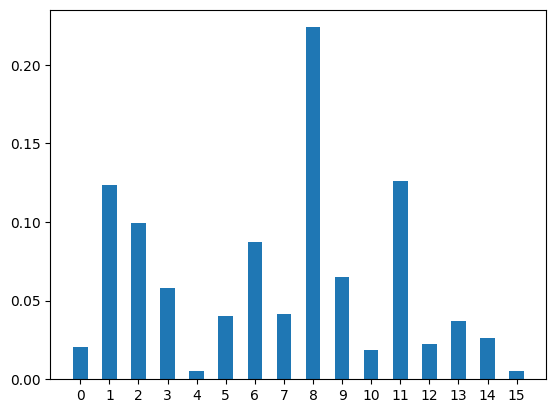



>>> Job ID: cl7qtltfa6vtjv8rva8g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{5: 0.00071, 12: 0.0091, 9: 0.02527, 1: 0.07707, 11: 0.13515, 14: 0.03558, 15: 0.0161, 10: 0.11779, 0: 0.00711, 7: 0.01855, 3: 0.07551, 4: 0.02728, 6: 0.12106, 2: 0.0807, 13: 0.03566, 8: 0.21736}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {5: 0.00071, 12: 0.0091, 9: 0.02527, 1: 0.07707, 11: 0.13515, 14: 0.03558, 15: 0.0161, 10: 0.11779, 0: 0.00711, 7: 0.01855, 3: 0.07551, 4: 0.02728, 6: 0.12106, 2: 0.0807, 13: 0.03566, 8: 0.21736}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
45
{5: 0.00071, 12: 0.0091, 9: 0.02527, 1: 0.07707, 11: 0.13515, 14: 0.03558, 15: 0.0161, 10: 0.11779, 0: 0.00711, 7: 0.01855, 3: 0.07551, 4: 0.02728, 6: 0.12106, 2: 0.0807, 13: 0.03566, 8: 0.21736}


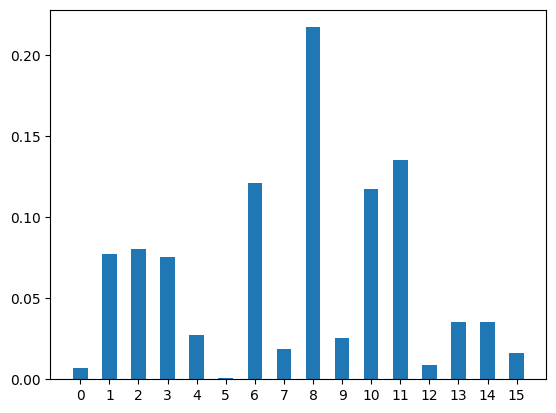



>>> Job ID: cl7qtnfl4q34kqgkfumg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{9: 0.01853, 2: 0.01446, 8: 0.18676, 0: 0.022, 7: 0.02191, 3: 0.11301, 5: 0.00357, 12: 0.04127, 15: 0.03712, 10: 0.08396, 14: 0.02326, 11: 0.0995, 1: 0.06804, 13: 0.05996, 4: 0.08896, 6: 0.11769}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {9: 0.01853, 2: 0.01446, 8: 0.18676, 0: 0.022, 7: 0.02191, 3: 0.11301, 5: 0.00357, 12: 0.04127, 15: 0.03712, 10: 0.08396, 14: 0.02326, 11: 0.0995, 1: 0.06804, 13: 0.05996, 4: 0.08896, 6: 0.11769}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
46
{9: 0.01853, 2: 0.01446, 8: 0.18676, 0: 0.022, 7: 0.02191, 3: 0.11301, 5: 0.00357, 12: 0.04127, 15: 0.03712, 10: 0.08396, 14: 0.02326, 11: 0.0995, 1: 0.06804, 13: 0.05996, 4: 0.08896, 6: 0.11769}


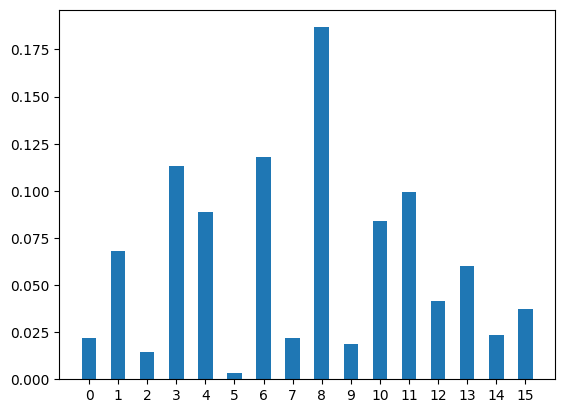



>>> Job ID: cl7qtovl4q34kqgkfvdg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{14: 0.01593, 5: 0.00828, 12: 0.03633, 15: 0.03283, 10: 0.05792, 8: 0.10452, 9: 0.09477, 2: 0.05702, 1: 0.04718, 11: 0.08398, 0: 0.01186, 7: 0.075, 3: 0.06888, 13: 0.10041, 4: 0.14286, 6: 0.06223}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {14: 0.01593, 5: 0.00828, 12: 0.03633, 15: 0.03283, 10: 0.05792, 8: 0.10452, 9: 0.09477, 2: 0.05702, 1: 0.04718, 11: 0.08398, 0: 0.01186, 7: 0.075, 3: 0.06888, 13: 0.10041, 4: 0.14286, 6: 0.06223}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
47
{14: 0.01593, 5: 0.00828, 12: 0.03633, 15: 0.03283, 10: 0.05792, 8: 0.10452, 9: 0.09477, 2: 0.05702, 1: 0.04718, 11: 0.08398, 0: 0.01186, 7: 0.075, 3: 0.06888, 13: 0.10041, 4: 0.14286, 6: 0.06223}


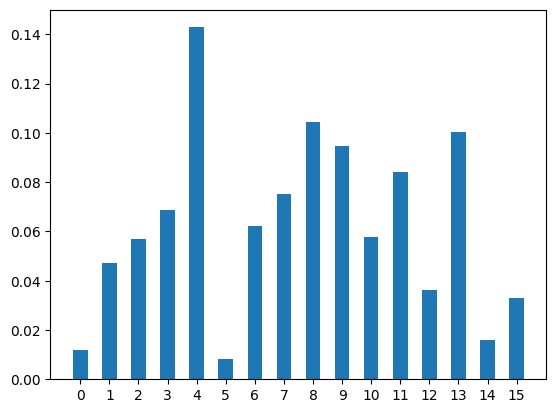



>>> Job ID: cl7qtqdfa6vtjv8rvclg
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.00275, 14: 0.02371, 11: 0.09998, 10: 0.04813, 15: 0.03577, 2: 0.09971, 6: 0.02651, 4: 0.02688, 13: 0.12863, 9: 0.09056, 12: 0.04572, 5: 0.15021, 8: 0.07158, 0: 0.01242, 3: 0.032, 7: 0.10544}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.00275, 14: 0.02371, 11: 0.09998, 10: 0.04813, 15: 0.03577, 2: 0.09971, 6: 0.02651, 4: 0.02688, 13: 0.12863, 9: 0.09056, 12: 0.04572, 5: 0.15021, 8: 0.07158, 0: 0.01242, 3: 0.032, 7: 0.10544}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
48
{1: 0.00275, 14: 0.02371, 11: 0.09998, 10: 0.04813, 15: 0.03577, 2: 0.09971, 6: 0.02651, 4: 0.02688, 13: 0.12863, 9: 0.09056, 12: 0.04572, 5: 0.15021, 8: 0.07158, 0: 0.01242, 3: 0.032, 7: 0.10544}


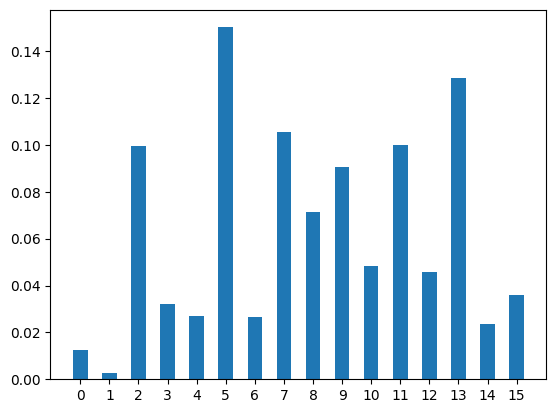



>>> Job ID: cl7qts57pau17fl1isg0
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.01178, 14: 0.02999, 15: 0.00448, 10: 0.0236, 2: 0.10226, 8: 0.02187, 5: 0.06053, 12: 0.13613, 4: 0.01646, 6: 0.11917, 3: 0.06517, 7: 0.11858, 0: 0.03253, 13: 0.11678, 11: 0.0172, 9: 0.12347}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.01178, 14: 0.02999, 15: 0.00448, 10: 0.0236, 2: 0.10226, 8: 0.02187, 5: 0.06053, 12: 0.13613, 4: 0.01646, 6: 0.11917, 3: 0.06517, 7: 0.11858, 0: 0.03253, 13: 0.11678, 11: 0.0172, 9: 0.12347}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}
49
{1: 0.01178, 14: 0.02999, 15: 0.00448, 10: 0.0236, 2: 0.10226, 8: 0.02187, 5: 0.06053, 12: 0.13613, 4: 0.01646, 6: 0.11917, 3: 0.06517, 7: 0.11858, 0: 0.03253, 13: 0.11678, 11: 0.0172, 9: 0.12347}


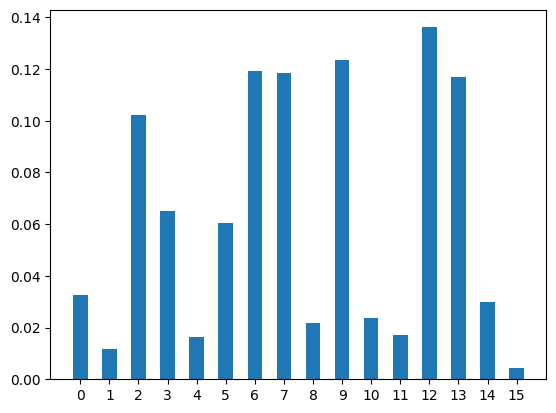

In [ ]:
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

    qc1 = QuantumCircuit(2)
    qc1.swap(0,1)
    CSwapgate = qc1.to_gate().control(2)

    circuit.x(p2)
    circuit.append(CSwapgate, [p1,p2,p0,p3])
    circuit.x(p2)
    circuit.x(p1)
    circuit.append(C3XGate(), [p0,p1,p3,p2])
    circuit.x(p1)

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  job = sampler.run(circuit, shots=100000)
  print(f">>> Job ID: {job.job_id()}")
  print(f">>> Job Status: {job.status()}")

  result = job.result()
  print(f">>> {result}")
  print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
  print(f"  > Metadata: {result.metadata[0]}")

  print(N)
  cnts = dict(result.quasi_dists[0])
  print(cnts)

  board = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  prob = []
  for i in range(16):
    prob.append(cnts.get(i, 0))

  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()